# October 2024

# Run Functions

In [4]:
%run "Baseball Functions.ipynb"

Length of nphl dataframe: 338645
Length of phils_sc dataframe: 455576


# Imports and Data

In [6]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#%run "Baseball Functions.ipynb"
woba_weights = pd.read_csv('wOBA and FIP Constants.csv')

# Load All Non-Phillies Player Data
nphl = get_nphillies_data()

# Load Phillies Player Data With Function I wrote lol
phils_sc, pos, pps = get_phillies_data()

Length of nphl dataframe: 338645
Length of phils_sc dataframe: 455576


# Red October: Postseason baseball in Philadelphia.
<br> Do't take it for granted, this is the third straight season the Phillies have been in the postseason. Let's first find some context around the accomplishment that is making the playoffs in Major League Baseball.

In [8]:

# In <df.agg({'game_year' : 'nunique'})> seasons in the Statcast era, the Phillies have made the postseason <df[df.season_type != 'R'].agg({'game_year' : 'nunique'})> times.


In [9]:
# OCtober elsewhere
# MJ Melendez catch % on that flyball:
# xBA on the Bobby Witt infield hit. He is the fastest man in baseball!

# NLDS
Playing the red hot New York Mets in the 2-6 matchup after the lower-seeded Metropolitans won a dramatic three game series in Milwaukee this week. Pete Alonso home run in the top of the 9th off a Devin Williams changeup changes the series. Catapults the Mets into the lead. Jesse Winker adds an insurance run but it was already decided. The Alonso home run changing the trajectory of the season for both his team and their opponents, the hosting Milwaukee Brewers. The Mets continue a magical run that propelled them into the playoffs as the 6th seed. They overcame the Brewers in a three game set to advance to the NLDS for the first time since their 2015 World Series year. I want to know how the Phillies will perform in this new playoff matchup with a divisional opponent.

For the Brewers it is another early-round defeat in the playoffs. ALthough the team has played postseason ball in the Senior Circuit 7 of the last 8 years, they have one appearance in the NLCS on the record as their furthest advancement during one tournament. Devin Williams comes in to the ballgame in the top of the 9th inning with a 2-0 lead. The Mets stage a comeback with one swing from Pete Alonso after two runners get on base in front of him. Alonso has been an elite run creator in the last few years but has not had the opportunity to do it in the playoffs before? Idk. maybe not. But he has done it now. Williams falls on his sword, using his devastating changeup that so frequently bamboozles opposing hitters. Game flipped on its head because of one pitch. Careers legacies exchanged with that 101.5 mph batted ball going 402 feet and clearing the fence the other way.

Ok, time to think about the Phillies

In [11]:
pp24 = pps[pps.game_year == 2024]
mp24 = pd.read_csv('mp24.csv')
mo24 = pd.read_csv('mo24.csv')

In [12]:
# Zack Wheeler at home against the Mets in his career and his performance this season.
# Look at his fuck you fastballs.
zw = pp24[pp24.player_name == 'Wheeler, Zack']
zwp = pps[pps.player_name == 'Wheeler, Zack']
zw.groupby('game_type',as_index=False).agg({'des' : 'count'})
                                             

,game_type,des
0,D,111
1,R,3134


In [13]:
zwp.groupby(['game_year'
             ,'game_type'
            ])
df = zwp[zwp.game_type != 'R']
z = results('home_team')

In [14]:
#z['inning'] = z.plate_apps - 
z['krate'] = z.strikeouts / z.plate_apps
z['ppa'] = z.pitches / z.plate_apps
z['hrrate'] = z.hrs / z.plate_apps
z.round(3)

,home_team,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba,krate,ppa,hrrate
0,ATL,171,48,30,7,1.0,2,15,0.156,0.208,0.222,0.431,0.196,0.312,3.562,0.021
1,AZ,99,28,19,6,1.0,1,8,0.222,0.250,0.370,0.620,0.267,0.286,3.536,0.036
2,HOU,139,44,31,9,1.0,4,8,0.231,0.318,0.385,0.703,0.313,0.182,3.159,0.023
3,PHI,409,99,58,12,2.0,5,34,0.130,0.192,0.207,0.398,0.183,0.343,4.131,0.020
4,SD,83,23,14,1,0.0,1,8,0.045,0.087,0.045,0.132,0.068,0.348,3.609,0.000
5,STL,96,22,16,2,0.0,1,4,0.100,0.182,0.100,0.282,0.144,0.182,4.364,0.000


In [15]:
df = zw
resgpk = results('game_pk')

i = df.groupby(['game_pk'
                ,'game_date'
                ,'home_team'
                ,'away_team'
                #,'batter'
                #,'p_throws''
                #,'stand'
                #,'pitch_type'
                
               ],as_index=False
              ).agg({'des' : 'count'
                       ,'launch_speed' : 'mean'
                       ,'hit_distance_sc' : 'mean'
                       ,'inning' : 'nunique'
                       ,'at_bat_number' : 'nunique'
                       ,'release_speed' : 'mean'
                      })
j = i.merge(resgpk, on = 'game_pk')
j.columns.tolist()

['game_pk',
 'game_date',
 'home_team',
 'away_team',
 'des',
 'launch_speed',
 'hit_distance_sc',
 'inning',
 'at_bat_number',
 'release_speed',
 'pitches',
 'plate_apps',
 'bip',
 'hits',
 'hrs',
 'walks',
 'strikeouts',
 'ba',
 'obp',
 'slg',
 'ops',
 'woba']

In [16]:
j[j.home_team == 'PHI'
 ].agg({'launch_speed' : 'mean'
       ,'des' : 'mean'
       ,'inning' : 'mean'
       ,'at_bat_number' : 'mean'
       ,'strikeouts' : 'sum'
       ,'hrs' : 'sum'
       ,'bip' : 'sum'
      })

launch_speed      80.811764
des               99.588235
inning             6.529412
at_bat_number     25.117647
strikeouts       124.000000
hrs                9.000000
bip              264.000000
dtype: float64

In [17]:
wheels = pd.concat([pps[pps.player_name == 'Wheeler, Zack'
                       ]
                    ,nphl[nphl.player_name == 'Wheeler, Zack'
                         ]
                   ]
                  )
df = wheels[wheels.home_team == 'NYM']
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2017,916,225,144,52,9.0,28.0,50,0.269,0.369,0.440,0.809,0.352
1,2018,1530,399,276,88,7.0,27.0,92,0.244,0.296,0.330,0.625,0.276
2,2019,1552,400,272,87,11.0,23.0,104,0.236,0.278,0.374,0.651,0.276
3,2020,83,28,19,8,0.0,0.0,7,0.308,0.357,0.462,0.819,0.355
4,2021,304,79,52,18,0.0,4.0,20,0.254,0.316,0.268,0.584,0.267
5,2022,196,53,37,13,1.0,3.0,12,0.265,0.321,0.429,0.749,0.327
6,2024,94,28,19,7,1.0,1.0,8,0.259,0.286,0.407,0.693,0.300


In [18]:
wheels

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP,source
119867,CH,2020-09-26,91.5,-1.46,5.43,"Wheeler, Zack",660294,554430,walk,blocked_ball,...,0.883,1.238,1.558,1.979,0.2,-0.435,0.125,10.282,3.191,NaN
119868,FF,2020-09-26,96.2,-1.38,5.49,"Wheeler, Zack",660294,554430,NaN,ball,...,0.883,1.238,1.558,1.979,0.2,-0.435,0.125,10.282,3.191,NaN
119869,FS,2020-09-26,90.4,-1.43,5.47,"Wheeler, Zack",660294,554430,NaN,called_strike,...,0.883,1.238,1.558,1.979,0.2,-0.435,0.125,10.282,3.191,NaN
119870,SI,2020-09-26,94.7,-1.41,5.43,"Wheeler, Zack",660294,554430,NaN,ball,...,0.883,1.238,1.558,1.979,0.2,-0.435,0.125,10.282,3.191,NaN
119871,FS,2020-09-26,88.4,-1.44,5.55,"Wheeler, Zack",660294,554430,NaN,ball,...,0.883,1.238,1.558,1.979,0.2,-0.435,0.125,10.282,3.191,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262287,SI,2017-04-07,96.2,-1.49,5.78,"Wheeler, Zack",543829,554430,field_out,hit_into_play,...,0.877,1.232,1.552,1.980,0.2,-0.423,0.122,10.048,3.158,n
262288,SI,2017-04-07,96.2,-1.48,5.70,"Wheeler, Zack",543829,554430,NaN,foul,...,0.877,1.232,1.552,1.980,0.2,-0.423,0.122,10.048,3.158,n
262289,SI,2017-04-07,94.9,-1.57,5.71,"Wheeler, Zack",543829,554430,NaN,ball,...,0.877,1.232,1.552,1.980,0.2,-0.423,0.122,10.048,3.158,n
262290,SI,2017-04-07,94.9,-1.48,5.76,"Wheeler, Zack",543829,554430,NaN,ball,...,0.877,1.232,1.552,1.980,0.2,-0.423,0.122,10.048,3.158,n


In [19]:
# The Mets were fairly thoroughly dominated in this one but came away the victors, remarkable.
# Ok on to game 2 after Zack Wheeler acts like his usual dominant self when the home_team is 'PHI' in the dataframe, res
an = pps[pps.player_name == 'Nola, Aaron']
df = an
results('game_type')# Aaron nola curveball usage vs the Mets
# so first, Aaron Nola Curveball usage by home_team
# then Aaron Nola curveball usage by player_name
df[df.game_type == 'F'].groupby(['game_date','home_team'],as_index=False).agg({'des' : 'count'
                                                                              ,'inning' : 'nunique'
                                                                              ,'at_bat_number' : 'nunique'})
# results('home_team').sort_values(by='pitches',ascending=False).head(5)
# # Man so Aaron Nola has success when the home_team is 'NYM' and when the home+team is 'PHI' which will be the whole darn series
# # Now want to see his pitch_usage so I gotta funky way to construct a df
# def pu_ht(df,teams):
#     puht = pitch_usage_by_home_team = pd.DataFrame()
#     for ht in df.home_team:
#         pm = pitch_mix(df[df.home_team == ht])
#         puht = pd.concat([puht, pm])
        
#     return puht[puht.home_team.isin(teams)]
# seana = pu_ht(an, results('home_team').sort_values(by='pitches',ascending=False).head(5).home_team.tolist())

,game_date,home_team,des,inning,at_bat_number
0,2022-10-08,STL,101,7,25
1,2023-10-04,PHI,88,7,23


In [20]:
# wow this is running so inefficiently!
# I have to make it stop
teams = ['PHI','NYM']
ks = results('home_team').sort_values(by='pitches',ascending=False).head(5)
ks[ks.home_team.isin(teams)]
anres = results('player_name')
anres.rename(columns = {'player_name' : 'home_team'},inplace=True)
ha = home_away_nola = pd.concat([ks,anres])
# Ok, home_away in a sense
ha

,home_team,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
16,PHI,13231,3417,2193,690,105.0,206.0,988,0.218,0.268,0.365,0.633,0.275
0,ATL,1637,447,316,105,16.0,28.0,99,0.257,0.304,0.429,0.733,0.313
25,WSH,1471,379,250,84,9.0,25.0,99,0.243,0.296,0.370,0.665,0.288
14,NYM,1422,365,227,72,13.0,22.0,110,0.213,0.271,0.379,0.650,0.283
11,MIA,1160,296,201,63,8.0,13.0,77,0.226,0.267,0.355,0.622,0.269
0,"Nola, Aaron",26406,6858,4535,1475,207.0,416.0,1833,0.233,0.284,0.385,0.668,0.289


In [21]:
# Up next, doing a bunch of fucking group bys
groups = pd.DataFrame()
for grouper in ['game_type','game_year','home_team','player_name'
                #,'stand'
               ]:
    df = an
    gt = results(grouper)
    gt.rename(columns = {grouper : 'grouper'},inplace=True)
    groups = pd.concat([groups, gt])

In [22]:
groups

,grouper,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,D,268,72,44,16,2.0,5.0,23,0.239,0.292,0.373,0.665,0.292
1,F,189,48,36,7,0.0,2.0,9,0.156,0.208,0.200,0.408,0.188
2,L,245,63,44,16,4.0,2.0,17,0.262,0.286,0.557,0.843,0.354
3,R,25556,6635,4383,1423,199.0,405.0,1775,0.232,0.283,0.383,0.667,0.288
4,W,148,40,28,13,2.0,2.0,9,0.351,0.400,0.568,0.968,0.418
0,2015,1117,320,229,74,11.0,18.0,68,0.249,0.294,0.401,0.694,0.301
1,2016,1796,484,327,116,10.0,26.0,121,0.264,0.306,0.395,0.701,0.301
2,2017,2665,693,458,154,18.0,47.0,184,0.240,0.293,0.382,0.675,0.291
3,2018,3212,830,542,149,17.0,55.0,224,0.197,0.254,0.310,0.564,0.249
4,2019,3332,850,532,176,27.0,77.0,229,0.233,0.311,0.393,0.703,0.302


In [23]:
# damn that was pretty fast
groups # fuck that is good shit, let's do some comparisons. I messaged myself on Teams.
reg = groups[groups.grouper == 'R']
#reg
groups
reg
playoffs = groups[groups.grouper.isin(['D','L','F','W'])]
df = playoffs = df[df.game_type != 'R']
playoffs_res = results('player_name')
playoffs_res
# Well no I could just make my grouper function do its thing over multiple groups!

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Nola, Aaron",850,223,152,52,8,11,58,0.248,0.291,0.424,0.715,0.31


## Recap of Regular Season Games
The Phillies are 7-6 in the season series but three of those losses were in games started by Taijuan Walker

In [25]:
po24 = pos[pos.game_year == 2024]
df = nympo = po24[(po24.home_team == 'NYM') | (po24.away_team == 'NYM')]
nymgms = df.groupby(['game_date'
            ,'game_pk'
            ,'home_team'
            ,'away_team'
           ],as_index=False
          ).agg({'post_home_score' : 'max'
                 ,'post_away_score' : 'max'
                })
rf = runs_for = nymgms[nymgms.home_team == 'PHI'].post_home_score.sum() + nymgms[nymgms.away_team == 'PHI'].post_away_score.sum()
ra = runs_for = nymgms[nymgms.home_team != 'PHI'].post_home_score.sum() + nymgms[nymgms.away_team != 'PHI'].post_away_score.sum()
rf, ra

print('The Phillies have scored {} runs against the Mets thhis year while giving up just {}.'.format(rf,ra))

The Phillies have scored 81 runs against the Mets thhis year while giving up just 82.


The Phillies have scored {{rf}} runs against the Mets this year while giving up just {{ra}}

In [27]:
# ChatGPT tells me that 69/13 = 5.31 and 59/13 = 4.54, how do those compare to the season average for the Phillies?
pogms = po24.groupby(['game_date'
              ,'game_pk'
              ,'home_team'
              ,'away_team'
             ],as_index=False
            ).agg({'post_home_score' : 'max'
                   ,'post_away_score' : 'max'
                  })
porf = pogms[pogms.home_team == 'PHI'].post_home_score.sum() + pogms[pogms.away_team == 'PHI'].post_away_score.sum()

ppgms = pp24.groupby(['game_date'
              ,'game_pk'
              ,'home_team'
              ,'away_team'
             ],as_index=False
            ).agg({'post_home_score' : 'max'
                   ,'post_away_score' : 'max'
                  })
ppra = ppgms[ppgms.home_team != 'PHI'].post_home_score.sum() + ppgms[ppgms.away_team != 'PHI'].post_away_score.sum()

rf_per_game = porf / pogms.game_pk.nunique()
ra_per_game = ppra / ppgms.game_pk.nunique()

print('The Phillies score {} runs per game while giving up {} runs on average.'.format(round(rf_per_game,2), round(ra_per_game,2)))

The Phillies score 4.8 runs per game while giving up 4.18 runs on average.


## Game 1: Senga vs Wheeler
Senga opens by giving up a lead off HR, Wheeler deals but the bullpen blows the 1-0 lead in the 8th. Shit show.

In [29]:
pps.game_date.max()

'2024-10-09'

In [30]:
# Wheeler had a lot of whiffs yesterday.
g1 = nldsg1 = ppnldsg1 = pps[pps.game_date == '2024-10-05']
df = g1
results('player_name')

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Banks, Tanner",20,5,3,2,0.0,0.0,2.0,0.400,0.400,0.400,0.800,0.353
1,"Hoffman, Jeff",13,3,2,2,0.0,1.0,0.0,1.000,1.000,1.000,2.000,0.818
2,"Kerkering, Orion",8,3,3,1,0.0,0.0,0.0,0.500,0.333,0.500,0.833,0.294
3,"Strahm, Matt",17,3,3,2,0.0,0.0,0.0,1.000,0.667,1.000,1.667,0.588
4,"Wheeler, Zack",111,26,12,1,0.0,4.0,9.0,0.048,0.231,0.048,0.278,0.168


## Game 2: Severino vs Sanchez
Time for Sanchy to step up.

In [32]:
# He gives up a 2-run home run to Mark Vientos in the top of the 3rd inning. Lindor got on by flipping a zone 9 cambio into left.

In [33]:
bohm_id = 664761
#po24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})

df = bohm_opportunities = pps[(pps.hit_location == 5)
    &(pps.fielder_5 == bohm_id)
    #&(pps.launch_speed == 72.5)
    #&(pps.launch_angle == -43)
   ]
opps = pps[(pps.hit_location == 5)
    &(pps.fielder_5 == bohm_id)
    &(pps.launch_speed >= 69.5)
    &(pps.launch_speed <= 75.5)
    &(pps.hit_distance_sc == 4)
    #&(pps.launch_angle == -43)
   ][['game_date','pitch_type','inning','outs_when_up'
     ,'release_speed','release_spin_rate','zone'
     ,'launch_speed','launch_angle','hit_distance_sc'
     ,'events','player_name'
      #,'des'
     ]]

opps.groupby('events',as_index=False).agg({'game_date' : 'count'})
#df = opps
#results('events')
opps[opps.events == 'single']

,game_date,pitch_type,inning,outs_when_up,release_speed,release_spin_rate,zone,launch_speed,launch_angle,hit_distance_sc,events,player_name
225828,2024-04-07,CH,5,1,84.4,2094.0,9.0,70.4,-21.0,4.0,single,"Sánchez, Cristopher"


In [34]:
df.agg({'launch_speed'  : ['mean','std','var','count']
        ,'launch_angle' : ['mean', 'std','var','count']
        ,'hit_distance_sc' : ['mean','std','var','count']
       }).round(2)

,launch_speed,launch_angle,hit_distance_sc
mean,80.63,-4.24,40.56
std,15.75,34.59,51.15
var,248.16,1196.34,2616.47
count,1371.00,1372.00,1368.00


(array([811., 118.,  69.,  68.,  73.,  72.,  68.,  48.,  33.,   8.]),
 array([  0. ,  20.5,  41. ,  61.5,  82. , 102.5, 123. , 143.5, 164. ,
        184.5, 205. ]),
 <BarContainer object of 10 artists>)

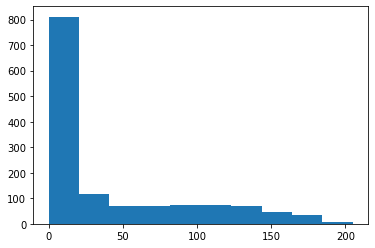

In [35]:
plt.hist(df.hit_distance_sc)

In [36]:
df = po24
res = results('player_name')
res[res.pitches >= 500].sort_values(by='ops',ascending=False)

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
5,"Harper, Bryce",2547,637,422,161.0,31.0,70.0,143,0.286,0.366,0.530,0.896,0.383
14,"Schwarber, Kyle",2936,708,394,144.0,39.0,104.0,203,0.244,0.359,0.480,0.838,0.362
19,"Turner, Trea",2121,558,418,152.0,21.0,29.0,103,0.291,0.335,0.460,0.795,0.344
0,"Bohm, Alec",2161,619,487,156.0,15.0,39.0,86,0.275,0.325,0.438,0.763,0.330
1,"Castellanos, Nick",2392,676,483,161.0,24.0,39.0,141,0.258,0.311,0.435,0.746,0.323
12,"Realmuto, J.T.",1655,430,286,101.0,14.0,29.0,106,0.257,0.319,0.415,0.733,0.321
9,"Marsh, Brandon",2059,491,280,105.0,16.0,50.0,157,0.242,0.320,0.406,0.726,0.317
15,"Sosa, Edmundo",1066,280,188,65.0,7.0,13.0,68,0.255,0.311,0.416,0.726,0.315
17,"Stott, Bryson",2368,582,429,126.0,11.0,53.0,97,0.244,0.313,0.356,0.669,0.295
13,"Rojas, Johan",1353,369,281,83.0,3.0,14.0,70,0.242,0.274,0.321,0.594,0.260


In [37]:
df = bm = po24[po24.player_name == 'Marsh, Brandon']
mz = marsh_zones = results('zone')
mz[mz.zone < 10]

,zone,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,1.0,125,23,8,6.0,0.0,0.0,15,0.261,0.261,0.348,0.609,0.262
1,2.0,102,38,26,8.0,3.0,0.0,12,0.211,0.211,0.500,0.711,0.297
2,3.0,77,12,6,0.0,0.0,1.0,5,0.000,0.083,0.000,0.083,0.057
3,4.0,145,52,33,18.0,2.0,0.0,19,0.353,0.346,0.529,0.876,0.372
4,5.0,150,58,49,19.0,2.0,0.0,9,0.333,0.328,0.526,0.854,0.361
5,6.0,97,43,39,17.0,3.0,0.0,4,0.405,0.395,0.643,1.038,0.439
6,7.0,77,27,21,7.0,1.0,0.0,6,0.259,0.259,0.370,0.630,0.272
7,8.0,112,46,39,14.0,3.0,0.0,7,0.311,0.304,0.600,0.904,0.377
8,9.0,74,27,22,7.0,2.0,0.0,5,0.269,0.259,0.577,0.836,0.341


In [38]:
# Another debilitating inning from the bottom of the lineup. Rojas as a spark plug.

In [39]:
df = pps[(pps.game_pk.isin(nymgms.game_pk.tolist()))
    &(pps.pitcher == 614179)
   ]
results('game_date')

,game_date,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2024-05-13,10,3,2,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.000
1,2024-05-16,30,6,3,0.0,0.0,0.0,3.0,0.000,0.000,0.000,0.000,0.000
2,2024-06-08,21,5,4,2.0,0.0,1.0,0.0,0.500,0.600,0.500,1.100,0.491
3,2024-06-09,3,1,1,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000
4,2024-09-13,16,3,2,1.0,0.0,0.0,1.0,0.333,0.333,0.333,0.667,0.294
5,2024-09-15,12,3,2,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.000
6,2024-09-19,20,5,3,2.0,0.0,2.0,0.0,0.667,0.800,1.000,1.800,0.703
7,2024-09-21,20,5,4,1.0,0.0,1.0,0.0,0.250,0.400,0.500,0.900,0.389
8,2024-10-06,16,6,6,3.0,1.0,0.0,0.0,0.500,0.500,1.000,1.500,0.635
9,2024-10-08,2,1,1,1.0,0.0,0.0,0.0,1.000,1.000,1.000,2.000,0.882


In [40]:
# ok let's get real fucking weird with it
files = os.listdir()
ipynbs = [f for f in files if '2024.ipynb' in f]
ipynbs

['AI Generated Phillies Season Analysis - 2024.ipynb',
 'August 2024.ipynb',
 'July 2024.ipynb',
 'June 2024.ipynb',
 'March and April 2024.ipynb',
 'May 2024.ipynb',
 'October 2024.ipynb',
 'September 2024.ipynb']

In [41]:
# does the Phillies walk rate plummet in the playoffs?
# walk rate
df = pos
results('game_year')
tot = pd.DataFrame()
for gy in [2022,2023,2024]:
    df = pos[pos.game_year == gy]
    res = results('game_type')
    res['game_year'] = gy
    tot = pd.concat([tot,res])

In [42]:
tot

,game_type,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba,game_year
0,D,544,147,102,36,5,8,35,0.271,0.313,0.459,0.772,0.330,2022
1,F,294,71,47,9,1,8,14,0.158,0.268,0.263,0.531,0.243,2022
2,L,656,168,111,37,10,10,45,0.237,0.292,0.494,0.785,0.337,2022
3,R,23854,6079,4183,1392,205,463,1363,0.252,0.314,0.421,0.734,0.320,2022
4,W,888,216,120,31,8,22,71,0.163,0.259,0.321,0.580,0.262,2022
0,D,609,153,94,36,11,18,38,0.273,0.366,0.561,0.927,0.392,2023
1,F,282,69,44,18,2,3,22,0.273,0.304,0.485,0.789,0.335,2023
2,L,956,251,164,51,11,24,60,0.229,0.303,0.439,0.742,0.318,2023
3,R,24250,6194,4115,1417,220,514,1480,0.255,0.323,0.437,0.760,0.328,2023
0,D,602,150,91,24,3,16,38,0.185,0.293,0.300,0.593,0.272,2024


In [43]:
df = bs = pos[pos.player_name == 'Stott, Bryson']
df = bs[bs.p_throws == 'R']
res = results('pitch_type').sort_values(by='pitches',ascending=False)
res[res.pitch_type.isin(['FF','CH'])]
df = df[df.release_speed >= 95]
results('pitch_type')
df[df.type == 'X']
# nope, yep, he is done

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
151858,FF,2022-10-04,95.8,-1.35,7.09,"Stott, Bryson",681082,434378,field_out,hit_into_play,...,0.72,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112
152725,SI,2022-09-30,96.1,-2.66,5.97,"Stott, Bryson",681082,666168,single,hit_into_play,...,0.72,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112
153794,FF,2022-09-21,96.2,-2.24,6.00,"Stott, Bryson",681082,592332,field_out,hit_into_play,...,0.72,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112
154078,SI,2022-09-20,97.7,-2.26,5.73,"Stott, Bryson",681082,647315,double_play,hit_into_play,...,0.72,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112
154184,FF,2022-09-18,96.5,-1.97,5.79,"Stott, Bryson",681082,675911,force_out,hit_into_play,...,0.72,0.884,1.261,1.601,2.072,0.2,-0.397,0.114,9.524,3.112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227563,FF,2024-04-03,95.2,-1.17,5.93,"Stott, Bryson",681082,593423,field_out,hit_into_play,...,0.72,0.882,1.254,1.589,2.048,0.2,-0.405,0.117,9.689,3.166
227644,FF,2024-04-03,95.1,-1.21,6.18,"Stott, Bryson",681082,518585,field_out,hit_into_play,...,0.72,0.882,1.254,1.589,2.048,0.2,-0.405,0.117,9.689,3.166
227683,FC,2024-04-02,96.6,-0.71,6.28,"Stott, Bryson",681082,668933,field_error,hit_into_play,...,0.72,0.882,1.254,1.589,2.048,0.2,-0.405,0.117,9.689,3.166
227712,FC,2024-04-02,95.6,-0.51,6.42,"Stott, Bryson",681082,668933,field_out,hit_into_play,...,0.72,0.882,1.254,1.589,2.048,0.2,-0.405,0.117,9.689,3.166


# BACK to the regular scheduled programming

In [45]:
# Kody Clemens opportunities in left_field
po24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})
kc7 = pps[(pps.hit_location == 7)
          &(pps.fielder_7 == 665019)
         ]
kc7.groupby('events',as_index=False).agg({'des' : 'count'})

,events,des
0,field_out,4
1,sac_fly,1
2,single,5


In [46]:
df = ok = pps[pps.player_name == 'Kerkering, Orion']
results('home_team')
ok[ok.events == 'home_run']

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,wHBP,w1B,w2B,w3B,wHR,runSB,runCS,R/PA,R/W,cFIP
203471,SI,2024-10-06,96.9,-1.08,5.73,"Kerkering, Orion",607043,689147,home_run,hit_into_play,...,0.72,0.882,1.254,1.589,2.048,0.2,-0.405,0.117,9.689,3.166
209858,FF,2024-08-15,96.4,-1.14,5.90,"Kerkering, Orion",660688,689147,home_run,hit_into_play,...,0.72,0.882,1.254,1.589,2.048,0.2,-0.405,0.117,9.689,3.166
210745,ST,2024-08-08,86.8,-1.73,5.45,"Kerkering, Orion",664983,689147,home_run,hit_into_play,...,0.72,0.882,1.254,1.589,2.048,0.2,-0.405,0.117,9.689,3.166


In [47]:
# gotta get the pitcher info right away
df = mp24
df.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'}).sort_values(by='des',ascending=False)
butto = 676130
df = pos[pos.pitcher == butto]
res = results('player_name')
res[res.player_name.isin([#'Realmuto, J.T.'
                          'Marsh, Brandon'
                          ,'Bohm, Alec'
                         ])
   ]

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Bohm, Alec",46,11,9.0,5.0,3.0,0.0,1.0,0.5,0.545,1.4,1.945,0.785
6,"Marsh, Brandon",38,9,7.0,0.0,0.0,1.0,1.0,0.0,0.111,0.0,0.111,0.077


In [48]:
pitch_mix(mp24[(mp24.pitcher == butto)
               &(mp24.stand == 'R')
              ]).round(2)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
1,FF,4-Seam Fastball,176,94.47,2396.18,8.04,30.0
2,SI,Sinker,147,93.72,2175.88,9.69,25.1
3,SL,Slider,96,84.97,2631.33,11.05,16.4
0,CH,Changeup,86,87.13,1835.80,11.22,14.7
4,ST,Sweeper,81,82.95,2546.36,11.26,13.8


In [49]:
df = po24[(po24.player_name == 'Bohm, Alec')
    ]#&(po24.
results('p_throws')

,p_throws,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,L,635,185,159,49,6,11,15,0.282,0.324,0.460,0.784,0.339
1,R,1526,434,328,107,9,28,71,0.272,0.325,0.429,0.754,0.326


In [50]:
df = kc = po24[po24.player_name == 'Clemens, Kody']
results('p_throws')

,p_throws,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,L,85,21,16,6,0.0,1,4,0.300,0.333,0.450,0.783,0.338
1,R,410,104,72,21,5.0,4,27,0.212,0.250,0.455,0.705,0.299


In [51]:
df = ks = po24[po24.player_name == 'Schwarber, Kyle']
results('pitch_type').sort_values(by='pitches',ascending=False)

,pitch_type,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
6,FF,905,231.0,129.0,44.0,16.0,44.0,55.0,0.243,0.394,0.541,0.935,0.399
13,SL,511,114.0,58.0,25.0,6.0,10.0,44.0,0.248,0.316,0.465,0.781,0.335
12,SI,443,113.0,75.0,33.0,3.0,18.0,19.0,0.355,0.460,0.495,0.955,0.418
0,CH,305,69.0,34.0,10.0,4.0,7.0,28.0,0.161,0.246,0.371,0.617,0.271
2,CU,220,47.0,25.0,9.0,6.0,4.0,18.0,0.209,0.277,0.651,0.928,0.384
5,FC,219,58.0,42.0,9.0,2.0,8.0,8.0,0.188,0.293,0.396,0.689,0.298
14,ST,162,37.0,14.0,7.0,1.0,8.0,15.0,0.241,0.405,0.414,0.819,0.367
8,FS,94,21.0,10.0,4.0,1.0,2.0,9.0,0.211,0.286,0.368,0.654,0.289
9,KC,28,6.0,2.0,1.0,0.0,2.0,2.0,0.250,0.500,0.250,0.750,0.377
15,SV,25,8.0,2.0,2.0,0.0,1.0,4.0,0.333,0.500,0.333,0.833,0.397


In [52]:
mp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'})
diaz = diaz_id = 621242
df = pos[pos.pitcher == diaz]
res = results('player_name')
res[res.player_name.isin(['Schwarber, Kyle'
                          ,'Turner, Trea'
                          ,'Harper, Bryce'
                          ,'Castellanos, Nick'
                         ])
   ]

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
3,"Castellanos, Nick",33,9,5.0,4.0,0.0,0.0,4.0,0.444,0.444,0.444,0.889,0.392
10,"Harper, Bryce",74,16,4.0,2.0,2.0,1.0,11.0,0.133,0.188,0.533,0.721,0.298
35,"Schwarber, Kyle",44,9,1.0,0.0,0.0,0.0,8.0,0.000,0.000,0.000,0.000,0.000
40,"Turner, Trea",13,4,3.0,1.0,0.0,0.0,1.0,0.250,0.250,0.250,0.500,0.220


In [53]:
ks = pos[pos.player_name == 'Harper, Bryce']
df = ks[(ks.zone <= 3)
        &(ks.p_throws == 'R')
        #&(ks.release_speed > 95)
        &(ks.pitch_type.isin(['FC','SL','ST']))
       ]
results('game_year')
# so they threw him a full count slider, K

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2019,38,13,8,2,1.0,0.0,5.0,0.154,0.154,0.385,0.538,0.216
1,2020,20,8,6,3,0.0,0.0,2.0,0.429,0.375,0.571,0.946,0.376
2,2021,20,5,5,2,1.0,0.0,0.0,0.500,0.400,1.500,1.900,0.650
3,2022,38,11,8,2,0.0,0.0,3.0,0.182,0.182,0.273,0.455,0.195
4,2023,28,5,3,1,0.0,1.0,1.0,0.250,0.400,0.250,0.650,0.316
5,2024,38,5,4,2,0.0,0.0,1.0,0.400,0.400,0.400,0.800,0.353


In [54]:
# Schwarber could have passed the baton.

In [55]:
df = ed = pd.concat([nphl[nphl.pitcher == diaz]
                ,pos[pos.pitcher == diaz]
               ])
inds = df.groupby(['player_name','batter'
           ],as_index=False
          ).agg({'des' : 'count'
                 ,'hit_distance_sc' : 'mean'
                 ,'launch_speed' : 'mean'
                 ,'release_speed' : 'mean'
                })
inds[inds.player_name.isin(['Turner, Trea'
                          ,'Harper, Bryce'
                          ,'Castellanos, Nick'
                            ,'Stott, Bryson'
                         ]
                      )]

,player_name,batter,des,hit_distance_sc,launch_speed,release_speed
4,"Castellanos, Nick",592206,45,187.368421,79.168421,94.477778
13,"Harper, Bryce",547180,74,143.500000,83.223529,95.728378
42,"Stott, Bryson",681082,30,188.166667,93.383333,94.296667
45,"Turner, Trea",607208,43,166.500000,81.087500,93.134884


In [56]:
pitch_mix(df[df.player_name == 'Stott, Bryson'])

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
0,FF,4-Seam Fastball,16,98.256250,2346.937500,9.812500,53.3
1,SL,Slider,14,89.771429,2285.428571,8.928571,46.7


In [57]:
df = df[df.player_name == 'Stott, Bryson']
df.groupby(['game_pk'
            ,'at_bat_number'
            ,'game_date'
            ,'events'
           ],as_index=False).agg({'des' : 'count'})

,game_pk,at_bat_number,game_date,events,des
0,661602,90,2022-08-21,field_out,1
1,662428,56,2022-08-13,field_out,1
2,662434,65,2022-08-12,field_out,1
3,745580,72,2024-05-16,single,1
4,745767,64,2024-09-22,walk,1
5,745826,70,2024-05-13,home_run,1
6,775313,72,2024-10-09,walk,1
7,775319,68,2024-10-06,triple,1


In [58]:
# So Now Tyler Megill is in the game?

In [59]:
# Well this fucking game.
# Stott two run triple in the bottom of the 8th put the Phillies in the lead.
# Stott hustles home on a dribbler to Vientos. Two run lead.
# Strahm gives up a two run homer to Vientos in the top of the 9th.
# Gets Nimmo out but here comes Hoffman for Alonso.

# Jeff Hoffman vs Pete Alonso
mo24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count'})
df = pps[(pps.player_name == 'Hoffman, Jeff')
    &(pps.batter == 624413)
   ]
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2023,7,3,3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.000
1,2024,21,4,1,0.0,0.0,1.0,2.0,0.0,0.25,0.0,0.25,0.172


In [60]:
hays_id = pos[pos.player_name == 'Hays, Austin'].batter.unique()[0]

In [61]:
df = pd.concat([pps[pps.batter == hays_id]
           ,pos[pos.batter == hays_id]
          ])
results('p_throws')

,p_throws,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,L,129,37,26,11,0.0,2,9,0.314,0.351,0.429,0.780,0.340
1,R,317,93,66,20,3.0,1,23,0.225,0.258,0.371,0.629,0.273


In [62]:
trea = pos[pos.player_name == 'Turner, Trea']
df = trea
results('home_team').sort_values(by='ops',ascending=False).reset_index(drop=True)

,home_team,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,TEX,39,13,11,5,0.0,0.0,2,0.385,0.385,0.769,1.154,0.473
1,MIL,97,27,19,11,2.0,0.0,8,0.407,0.407,0.630,1.037,0.443
2,CHC,94,27,19,10,2.0,0.0,8,0.370,0.370,0.630,1.000,0.427
3,MIN,47,13,11,4,1.0,1.0,1,0.333,0.385,0.583,0.968,0.414
4,SD,90,21,17,7,1.0,1.0,3,0.350,0.381,0.550,0.931,0.398
5,PHI,2490,640,468,183,32.0,42.0,121,0.309,0.359,0.547,0.907,0.386
6,CLE,51,14,9,4,0.0,1.0,4,0.308,0.357,0.538,0.896,0.377
7,STL,118,28,19,9,0.0,3.0,5,0.360,0.429,0.400,0.829,0.370
8,CWS,63,14,8,3,1.0,1.0,5,0.231,0.286,0.538,0.824,0.345
9,TB,53,14,8,4,1.0,0.0,6,0.286,0.286,0.500,0.786,0.332


# A Summary of Bryce Harper's greatest AB to date as a Philadelphia Phillies baseball player.
2-2 2 outs man on first, Trea Turner, and Harper spits on a fastball above the zone.<br>
Waino wants the split<br>
AJ wants it in the dirt<br>
Make him take the split down. Bryce Harper does that. A reminder to his teammates, pass the baton.<br>
So now it is Nick Castellanos's turn to step up. Whiff pitch 1, fights off a SI in the dick for strike 2. Takes his timeout.

In [64]:
# Casty spits on a SL in the other batter's box. Good take, Nick.
# Gotta get back to the fastball, or the split?
# Nah, fuck it. He whacks a sl that backs up into left field. Ballgame over. The Phillies split the Mets.
# Back to NYM and the Phillies have to get one. Feels good having Nola going in Game 3, though. He loves pitching at Citi Field.

In [65]:
#casty loves the LDS!

In [66]:
df = pos[pos.game_type == 'D']
res = results('player_name')
nc = res[res.player_name == 'Castellanos, Nick']
nc

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
1,"Castellanos, Nick",157,51,42,19.0,5.0,3.0,6.0,0.396,0.431,0.75,1.181,0.495


## Game 3: Manaea vs Nola

In [68]:
# Ok some takeaways real quick, post Game 2
# Nola magic @ Citi Field
# Nola on the road in the playoffs?

In [69]:
# Nola magic @ Citi Field
nola = pps[pps.player_name == 'Nola, Aaron']
df = nola
cols = ['home_team'
        ,'away_team'
        ,'player_name'
        ,'game_year'
        ,'game_type'
       ]

In [70]:
df = nola
ht = results('home_team')#.rename(columns = {'home_team' : 'group'})
at = results('away_team')#.rename(columns = {'away_team' : 'group'})
an = results('player_name')#.rename(columns = {'player_name' : 'group'})
gy = results('game_year')#.rename(columns = {'game_year' : 'group'})
gt = results('game_type')#.rename(columns = {'game_type' : 'group'})
z = pd.concat([ht[ht.home_team.isin(['NYM','PHI'])]
               ,at[at.away_team.isin(['NYM', 'PHI'])]
               ,an
              ])
# Nola OPS @ Citi Field is .636 in his career.
# Nola OPS on the road is .702 in his career., .688 anywhere, and in the playoffs

In [71]:
df = nola[nola.game_type != 'R']
ps = postseason = results('player_name')
psgy = postseason_by_year = results('game_year')
ps['group'] = 'playoffs'
psgy['group'] = 'playoff_year'
ht['group'] = 'home_team'
at['group'] = 'away_team'
an['group'] = 'Career'
gy['group'] = 'Year'
#df = nola[nola.game_type == 'R']
gps = pd.concat([
                ps
               #,psgy
               ,ht[ht.home_team == 'NYM']
               ,at[at.away_team == 'PHI']
               ,an
               ,gy[gy.game_year == 2024]
                ])

In [72]:
gps['krate'] = gps.strikeouts / gps.plate_apps
gps['bbrate'] = gps.walks / gps.plate_apps
gps['hrrate'] = gps.hrs / gps.plate_apps

gps[['group'
     ,'pitches'
     ,'plate_apps'
     ,'ba'
     ,'ops'
     ,'krate'
     ,'bbrate'
     ,'hrrate'
     #,'walks'
     #,'strikeouts'
    ]].round(3)

,group,pitches,plate_apps,ba,ops,krate,bbrate,hrrate
0,playoffs,850,223,0.248,0.715,0.260,0.049,0.036
14,home_team,1422,365,0.213,0.650,0.301,0.060,0.036
17,away_team,13175,3441,0.248,0.703,0.246,0.061,0.030
0,Career,26406,6858,0.233,0.668,0.267,0.061,0.030
9,Year,3275,844,0.247,0.719,0.242,0.062,0.038


In [73]:
# Nola curveball usage in career vs playoffs vs Citi Field
# Ok, so similar task but going to compare different groups
anpm = pitch_mix(nola)
pspm = pitch_mix(nola[nola.game_type != 'R'])
nympm = pitch_mix(nola[(nola.home_team == 'NYM')
                       |(nola.away_team == 'NYM')
                      ]
                 )
cfpm = pitch_mix(nola[nola.home_team == 'NYM'])
anpm['group'] = 'Aaron Nola Career'
pspm['group'] = 'Aaron Nola Playoffs'
nympm['group'] = 'Aaron Nola against NYM'
cfpm['group'] = 'Aaron Nola @ Citi Field'
#pm['group'] = ''

k = pd.concat([
                anpm[anpm.pitch_type.isin(['CU','KC'])]
               ,pspm[pspm.pitch_type.isin(['CU','KC'])]
               ,nympm[nympm.pitch_type.isin(['CU','KC'])]
               ,cfpm[cfpm.pitch_type.isin(['CU','KC'])]
])
k.groupby('group',as_index=False).agg({'count' : 'sum'
                                       ,'release_speed' : 'mean'
                                       ,'release_spin_rate' : 'mean'
                                       ,'usage' : 'sum'
                                      }).round(2)
#k[['group','release_speed','release_spin_rate','usage']]

,group,count,release_speed,release_spin_rate,usage
0,Aaron Nola @ Citi Field,394,77.70,2579.09,27.7
1,Aaron Nola Career,8069,77.76,2543.17,30.5
2,Aaron Nola Playoffs,269,80.03,2645.26,31.6
3,Aaron Nola against NYM,783,77.74,2584.27,28.0


In [74]:
pitch_mix(nola[(nola.game_year==2024)&(nola.away_team == 'NYM')])

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
3,KC,Knuckle Curve,34,79.250000,2587.176471,11.058824,37.8
4,SI,Sinker,25,92.080000,2231.800000,9.800000,27.8
2,FF,4-Seam Fastball,17,92.800000,2339.176471,7.588235,18.9
0,CH,Changeup,7,85.757143,1513.571429,9.714286,7.8
1,FC,Cutter,7,88.271429,2271.428571,10.714286,7.8


In [75]:
# Finally a recap of each of Nola's starts against the Mets in 2024

In [76]:
df = an_nym_2024 = nola[(nola.game_year==2024)&((nola.away_team == 'NYM') | (nola.home_team == 'NYM'))]
res = results('game_date')

In [77]:
# Box Score
inds = df.groupby(['game_pk'
            ,'game_date'
            ,'home_team'
            ,'away_team'
           ],as_index=False
          ).agg({'des' : 'count' # get pitches from results
                 ,'inning' : 'nunique'
                 ,'at_bat_number' : 'nunique'
                 # ks from results
                 ,'pitch_type' : 'nunique'
                 ,'release_speed' : 'mean'
                 ,'release_spin_rate' : 'mean'
                 # bip from results
                 ,'launch_speed' : 'mean'
                 ,'launch_angle' : 'mean'
                 ,'hit_distance_sc' : 'mean'
                 ,'estimated_ba_using_speedangle' : 'mean'
                 ,'estimated_woba_using_speedangle' : 'mean'
                 ,'post_home_score' : 'max'
                 ,'post_away_score' : 'max'
                })

In [78]:
data = res.merge(inds, on = 'game_date')
data[['game_date'
      ,'home_team'
      ,'post_home_score'
      ,'away_team'
      ,'post_away_score'
      ,'pitches'
      ,'inning'
      ,'at_bat_number'
      ,'bip'
      ,'hits'
      ,'strikeouts'
      ,'walks'
      ,'hrs'
      #
     ]]
      

,game_date,home_team,post_home_score,away_team,post_away_score,pitches,inning,at_bat_number,bip,hits,strikeouts,walks,hrs
0,2024-05-14,NYM,0,PHI,4,109,9,30,22,4,8,0.0,0.0
1,2024-09-13,PHI,0,NYM,6,90,5,21,12,6,7,2.0,2.0
2,2024-10-08,NYM,2,PHI,0,86,6,22,12,5,8,2.0,2.0


### Top 1

In [80]:
manaea_id = 640455
mp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count'})
sm = mp24[mp24.pitcher == manaea_id]
phillies_vs_manaea = pd.concat([pos[pos.pitcher == manaea_id]
                                ,nphl[nphl.pitcher == manaea_id]
                               ])
df = posm = pos[pos.pitcher == manaea_id]
res = results('player_name')

In [81]:
lineup = ['Schwarber, Kyle'
          ,'Turner, Trea'
          ,'Harper, Bryce'
          ,'Castellanos, Nick'
          ,'Bohm, Alec'
          ,'Realmuto, J.T.'
          ,'Hays, Austin'
          ,'Sosa, Edmundo'
          ,'Rojas, Johan'
         ]
res[res.player_name.isin(lineup)].sort_values(by='ops',ascending=False)

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
20,"Sosa, Edmundo",34,11,7,5.0,1.0,0.0,3.0,0.500,0.545,1.100,1.645,0.665
18,"Schwarber, Kyle",49,11,7,2.0,1.0,3.0,1.0,0.250,0.455,0.625,1.080,0.455
7,"Harper, Bryce",65,14,11,4.0,1.0,0.0,3.0,0.286,0.286,0.643,0.929,0.389
2,"Bohm, Alec",41,14,11,3.0,1.0,0.0,3.0,0.231,0.214,0.462,0.676,0.269
3,"Castellanos, Nick",49,13,9,2.0,1.0,0.0,4.0,0.154,0.154,0.462,0.615,0.255
23,"Turner, Trea",37,8,5,1.0,0.0,1.0,2.0,0.143,0.250,0.143,0.393,0.196
15,"Realmuto, J.T.",48,11,5,1.0,0.0,1.0,4.0,0.111,0.273,0.111,0.384,0.208
8,"Hays, Austin",8,3,1,0.0,0.0,0.0,2.0,0.000,0.000,0.000,0.000,0.000
16,"Rojas, Johan",35,7,5,0.0,0.0,0.0,2.0,0.000,0.000,0.000,0.000,0.000


In [82]:
ttnp = phillies_vs_manaea[phillies_vs_manaea.player_name == 'Turner, Trea']
ttnp.groupby('events',as_index=False).agg({'des' : 'count'
                                           ,'launch_speed' : 'max'
                                           ,'zone' : 'min'
                                           ,'hit_distance_sc' : 'mean'
                                           ,'launch_angle' : 'mean'
                                           ,'pitch_type' : 'max'
                                          })

,events,des,launch_speed,zone,hit_distance_sc,launch_angle,pitch_type
0,field_out,7,106.6,2.0,120.714286,18.571429,SI
1,grounded_into_double_play,1,90.7,2.0,45.000000,-1.000000,FF
2,home_run,1,103.0,5.0,411.000000,33.000000,SL
3,single,5,108.2,4.0,151.800000,-1.600000,FF
4,strikeout,4,NaN,3.0,NaN,NaN,FF
5,walk,1,NaN,12.0,NaN,NaN,SI


In [83]:
pitch_mix(sm)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
3,SI,Sinker,1397,92.371725,2031.622963,7.385827,45.3
5,ST,Sweeper,597,77.764824,2168.726644,9.413735,19.4
0,CH,Changeup,357,85.331092,1504.075581,10.473389,11.6
2,FF,4-Seam Fastball,340,92.342647,2003.753709,7.864706,11.0
1,FC,Cutter,214,88.404673,2043.151659,8.546729,6.9
4,SL,Slider,177,85.162712,2053.248588,8.005650,5.7


In [84]:
rhb_pitch_mix(sm)

,pitch_type,pitch_name,count,release_speed,release_spin_rate,zone,usage
3,SI,Sinker,1031,92.349952,2031.122266,7.514064,42.7
5,ST,Sweeper,434,77.465899,2167.536131,9.460829,18.0
0,CH,Changeup,343,85.313703,1505.178788,10.451895,14.2
2,FF,4-Seam Fastball,283,92.259011,1999.950355,8.028269,11.7
1,FC,Cutter,180,88.338333,2036.111732,8.405556,7.4
4,SL,Slider,146,85.200000,2054.958904,7.917808,6.0


In [85]:
res[res.player_name == 'Harper, Bryce']

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
7,"Harper, Bryce",65,14,11,4.0,1.0,0.0,3.0,0.286,0.286,0.643,0.929,0.389


In [86]:
df = posm[posm.game_type == 'R']
res = results('player_name')
res[res.player_name == 'Harper, Bryce']

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
7,"Harper, Bryce",51,10,8,3.0,1.0,0.0,2.0,0.3,0.3,0.7,1.0,0.418


In [87]:
#all three hits fucking smoked, each 106 mph but nonetheless a 1-2-3 inning for Manaea.
po24[po24.type == 'X'].agg({'launch_speed' : ['mean','std','var','median','min','max']}).round(2)

,launch_speed
mean,88.59
std,14.80
var,219.12
median,91.50
min,11.50
max,115.80


(array([   2.,   16.,   27.,   63.,  150.,  421.,  774., 1117., 1341.,
         386.]),
 array([ 11.5 ,  21.93,  32.36,  42.79,  53.22,  63.65,  74.08,  84.51,
         94.94, 105.37, 115.8 ]),
 <BarContainer object of 10 artists>)

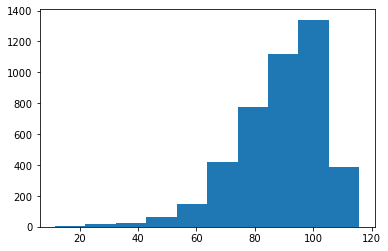

In [88]:
plt.hist(po24[po24.type == 'X'].launch_speed)

In [89]:
po24[(po24.type == 'X')
     &(po24.launch_speed >= 106)
    ].groupby('events',as_index=False).agg({'des' : 'count'
                                           ,'launch_angle' : 'mean'
                                           ,'launch_speed' : 'mean'})

,events,des,launch_angle,launch_speed
0,double,60,14.816667,108.558333
1,double_play,1,7.000000,112.100000
2,field_out,80,5.475000,107.891250
3,force_out,5,-14.200000,107.140000
4,grounded_into_double_play,5,-11.400000,108.520000
5,home_run,75,27.026667,108.893333
6,sac_fly,1,16.000000,106.800000
7,single,98,4.724490,108.477551
8,triple,2,17.000000,107.200000


### Bot 1
Nola gives up a loud first out to Lindor. Caught right in front Kolby Allard in the Phillies bullpen by Johan Rojas.

In [91]:
# just tells Mark Vientos to go fuck himself with that 0-2 curveball.

In [92]:
# Nimmo eats shit against Nola
om = mo24.groupby(['player_name','batter'],as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})
pm = mp24.groupby(['player_name','pitcher'],as_index=False).agg({'des' : 'count', 'game_pk' : 'nunique'})
df = nola.merge(om, on = 'batter', suffixes = ('','_mets'))
res = results('player_name_mets')
res[res.player_name_mets == 'Nimmo, Brandon']

,player_name_mets,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
12,"Nimmo, Brandon",313,68,34.0,13.0,2.0,13.0,20.0,0.236,0.382,0.382,0.764,0.345


### Top 2

In [94]:
# Lots of contact, J.T. gets plunked with 2 outs but nothing to show for it.

### Bot 2

In [96]:
om.sort_values(by='des',ascending=False)
mets_lineup = ['Lindor, Francisco'
               ,'Vientos, Mark'
               ,'Nimmo, Brandon'
               ,'Alonso, Pete'
               ,'Iglesias, Jose'
               ,'Winker, Jesse'
               ,'Marte, Starling'
               ,'Taylor, Tyrone'
               ,'Alvarez, Francisco'
               #,'Martinez, J.D.'
              ]
res[res.player_name_mets.isin(mets_lineup)]

,player_name_mets,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Alonso, Pete",225,57,37.0,17.0,6.0,5.0,15.0,0.327,0.386,0.731,1.117,0.462
1,"Alvarez, Francisco",15,4,3.0,2.0,1.0,0.0,1.0,0.500,0.500,1.250,1.750,0.732
5,"Iglesias, Jose",43,11,11.0,5.0,0.0,0.0,0.0,0.455,0.455,0.545,1.000,0.434
6,"Lindor, Francisco",146,39,27.0,7.0,0.0,1.0,9.0,0.194,0.256,0.250,0.506,0.232
7,"Marte, Starling",109,33,23.0,11.0,1.0,0.0,10.0,0.333,0.333,0.485,0.818,0.353
12,"Nimmo, Brandon",313,68,34.0,13.0,2.0,13.0,20.0,0.236,0.382,0.382,0.764,0.345
14,"Taylor, Tyrone",56,14,9.0,4.0,0.0,1.0,3.0,0.333,0.429,0.500,0.929,0.406
16,"Vientos, Mark",23,6,4.0,2.0,0.0,0.0,2.0,0.333,0.333,0.333,0.667,0.294
18,"Winker, Jesse",107,28,24.0,5.0,2.0,2.0,2.0,0.192,0.250,0.423,0.673,0.290


In [97]:
# Pete Alonso takes Aaron Nola deep to start the bottom of the second inning. Tough.
# Iglesias then gets a hit, oh brother. The big inning.

# Holy shit, that was incredible.
# Winker hits a high flyball that would have been a homer at CBP, pushes Castellanos to the wall who leaps to make the catch.
# Chaos ensues and we get a long video review since Casty dropped the ball on the transfer, got called a hit on the field. Bleh.
# Nola then gets a towering flyout from Marte on the first pitch. Battles through a Tyrone Taylor hard-hit foul to get the whiff K.

# If that was the big inning, wow. Just the one run for the Mets thanks to a clutch defensive play by Nick Castellanos and a bit of luck.

### Top 3

In [99]:
# Needing to bounce back, the Phillies best hitter against Sean Manaea steps up and wears the first pitch off his elbow pad.
# Rojas bunt? Yes, he takes the first pitch ST off the plate

In [100]:
# Sosa could run?

In [101]:
# No showing bunt, Rojas takes 90 right down the pipe. Maybe it was a front door, let's try a quick Statcast Search.

In [102]:
# Takes an ugly swing at a CH in the other batter's box. Damn.

In [103]:
# Spits on the a worse version of the same pitch.

In [104]:
# Probably getting the high heat here.

In [105]:
# Can't catch up. Damn. But a runner on and just the one out as the lineup turns over. Come on, Kyle!

In [106]:
df = posm
x = results('player_name')
x[x.player_name.isin(lineup)]

,player_name,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
2,"Bohm, Alec",41,14,11,3.0,1.0,0.0,3.0,0.231,0.214,0.462,0.676,0.269
3,"Castellanos, Nick",49,13,9,2.0,1.0,0.0,4.0,0.154,0.154,0.462,0.615,0.255
7,"Harper, Bryce",65,14,11,4.0,1.0,0.0,3.0,0.286,0.286,0.643,0.929,0.389
8,"Hays, Austin",8,3,1,0.0,0.0,0.0,2.0,0.000,0.000,0.000,0.000,0.000
15,"Realmuto, J.T.",48,11,5,1.0,0.0,1.0,4.0,0.111,0.273,0.111,0.384,0.208
16,"Rojas, Johan",35,7,5,0.0,0.0,0.0,2.0,0.000,0.000,0.000,0.000,0.000
18,"Schwarber, Kyle",49,11,7,2.0,1.0,3.0,1.0,0.250,0.455,0.625,1.080,0.455
20,"Sosa, Edmundo",34,11,7,5.0,1.0,0.0,3.0,0.500,0.545,1.100,1.645,0.665
23,"Turner, Trea",37,8,5,1.0,0.0,1.0,2.0,0.143,0.250,0.143,0.393,0.196


In [107]:
ks = pos[pos.player_name == 'Schwarber, Kyle']
df = ks[(ks.p_throws == 'L')
        &(ks.pitch_type == 'SI')
       ]
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2022,228,57,37,15,3,9,11,0.312,0.421,0.500,0.921,0.404
1,2023,233,58,29,10,5,10,18,0.217,0.362,0.587,0.949,0.394
2,2024,269,72,50,20,2,11,10,0.333,0.444,0.467,0.911,0.403


In [108]:
# Nope, Schwarber cannot catch up to 95 at the top of the zone. Ok, pass the baton to Trea.

In [109]:
# Trea passes the baton with a first-pitch knock to left. Attaboy Trea!

In [110]:
# Can Sosa get to third?
# Fuck Harper whiffs at the ST first pitch
# ST again and he fouls it off. F.

In [111]:
# Harper weakly pokes one back to Manaea. Ok, just pass the baton fellas.

### Bot 3
Could go for a shutdown inning here, Aaron Nola. Even though the Phillies did not score, they forced some high-stress pitches from Manaea.

In [113]:
# Due up, Alvarez who will be aggressive, then Lindor who will be patient followed by Vientos who you cannot throw a changeup to.

In [114]:
mopp = pps.merge(om,on = 'batter', suffixes = ('','_mets'))
df = mopp
res = mets_res = results('player_name_mets')
res

,player_name_mets,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,"Acuña, Luisangel",67,24,18,6,1.0,1.0,5,0.261,0.292,0.522,0.813,0.343
1,"Alonso, Pete",1546,406,273,88,19.0,38.0,82,0.251,0.342,0.476,0.818,0.352
2,"Alvarez, Eddy",45,12,10,2,0.0,0.0,1,0.182,0.250,0.364,0.614,0.264
3,"Alvarez, Francisco",246,64,40,10,5.0,4.0,20,0.169,0.219,0.441,0.659,0.277
4,"Bader, Harrison",238,63,41,10,1.0,5.0,17,0.172,0.238,0.259,0.497,0.225
5,"Baty, Brett",274,67,46,12,1.0,2.0,18,0.190,0.224,0.270,0.494,0.217
6,"Gamel, Ben",399,98,60,23,4.0,8.0,28,0.261,0.337,0.443,0.780,0.337
7,"Iglesias, Jose",443,120,98,38,3.0,2.0,20,0.322,0.333,0.449,0.782,0.336
8,"Lindor, Francisco",1127,289,202,61,6.0,26.0,55,0.239,0.322,0.369,0.690,0.306
9,"Marte, Starling",1226,312,225,102,7.0,14.0,61,0.358,0.407,0.530,0.937,0.402


In [115]:
# just a steady diet of KC for Lindor, two to start him here in the third.

In [116]:
# tries to throw a front door sinker but it misses up.

In [117]:
# Gets to his CH but it is low, gonna be the curve I suspect.

In [118]:
# It is, and Lindor throws it straight out to Rojas. One down.

In [119]:
# Mark Vientos steps in and rolls over the first pitch KC, turn it.

In [120]:
# lol jk, he fouls off the actual first pitch SI diving into Zone 7.

In [121]:
# 79 mph KC below the zone (south of 7 or 8) gets looped into left but playable for Hays.

In [122]:
# does Nola usually get more whiffs?

In [123]:
# He pops up a first pitch CH. Ok, so Harper and Schwarber did not come through. Will the bottom of the order?

### Top 4

In [125]:
# Casty is swinging at the first pitch

In [126]:
nc = po24[po24.player_name == 'Castellanos, Nick']
df = nc[nc.pitch_number == 1]
res = results('player_name')

In [127]:
res.bip/res.pitches # He put the ball in play 17.5% of the first pitches he saw, how about the ones he swung at?

0    0.177515
dtype: float64

In [128]:
df.groupby('description',as_index=False).agg({'des' : 'count'})
# he hits it foul

,description,des
0,ball,190
1,blocked_ball,9
2,called_strike,127
3,foul,108
4,foul_tip,8
5,hit_by_pitch,3
6,hit_into_play,120
7,swinging_strike,108
8,swinging_strike_blocked,3


In [129]:
# Good take 0-2 Casty.

In [130]:
# Make him throw a heater over the plate, which he does and Casty "flexes it foul"
# Pass the baton boys.

In [131]:
# Great take, he won't climb the ladder.

In [132]:
# Gets one in the zone but is late and fouls it off.

In [133]:
# Gotta be a CH I imagine, but Casty hit one out in September on a Zone 9 CH from Manaea so he sticks with the heater.

In [134]:
# Castellanos flies out to right, but a decent at bat. Pass the baton.

In [135]:
# Alec Bohm - needs to pass the baaton.
# He does just that by splitting the gap but thrown out at second by Tyrone Taylor. Holy shit.

In [136]:
# Great patience by JT to lay off the first two pitches, get Manaea back in the at bat.
# Whiffs at a 2-0 CH below the zone. Wow, just wow.

In [137]:
# Big ST sits in the zone and Realmuto yanks it into the dugout.

### Bot 4

In [139]:
# Nola spins to KC below the zone then drops two hammer SIs into 7.
# Spins a KC in the dirt but now is full against a lead off Alonso, gotta be in the zone.
# And he dots the 92 mph SI at the knees. Phew.

In [140]:
# Iglesias smacked a KC through the 5-6 hole his first time up, let's go right at him, Noles.

In [141]:
# Again with the heater in on the hands.

In [142]:
# FC just spins a little too much out. Get it out there, really out there huh JT?
# Runs the heater up in a 1-1 count, not great.
# ~KC~ Instead he throws the SI and gets a weak liner tossed back to him by Iglesias.

In [143]:
# Winker takes a FF up, he hit a ball a long way his first time. Now he is ahead 2-0.

In [144]:
# Does he get a KC?

In [145]:
# No, a CH at the knees in Zone 7, tremendous call there JT. I think if that misses they still do not eed to get Winker.
# Well, they went ahead and fed Winker a 93 mph FF right down the pipe.

In [146]:
# He crushes it, just unbelievable. Get to the plate, boys.

In [147]:
# Nola nerves of steel just dots a 93 SI into Zone 9 to start off Marte. Hunker down, Noles.

In [148]:
# KC in the dirt.

In [149]:
# KC in the dirt again and a whiff by Marte.

In [150]:
# KC in the dirt to get out of this inning. Ok, Nola.

### Top 5
Time for the sticks to step up. Hays to lead off followed by Sosa and Rojas. Can the bottom of the order do it? This is why we have the platoon. It is as simple as that.

In [152]:
# Austin Hays, you crush lefties, you have not faced Manaea much
rsm = rhb_pitch_mix(sm)
sm[sm.stand == 'R'].groupby(['pitch_type'],as_index=False).agg({'release_speed' : 'std'
                                                                ,'release_spin_rate' : 'std'
                                                               })

,pitch_type,release_speed,release_spin_rate
0,CH,1.497137,238.216489
1,FC,1.450304,84.926927
2,FF,1.681822,90.155566
3,SI,1.406523,83.378917
4,SL,1.285945,87.736901
5,ST,2.004277,105.503761


In [153]:
# Hays falls behind on a first pitch ST then whiffs on a 91 mph SI above the zone.

In [154]:
# Hays then whiffs on a CH. Well thanks for the contributions this season Austin Hays.

In [155]:
# Sosa meanwhile whiffs at a ST that hits him on the backfoot, whoops.

In [156]:
# Then he chases a CH out of the zone too. Great.

In [157]:
# Rojas has consistently been a problem the first two games.

In [158]:
# He is not.

### Bot 5

In [160]:
# Nola drops a good CH with two strikes to Taylor. Punchout.

In [161]:
# Gotta get Alvarez.

In [162]:
# Back door SI to start.

In [163]:
# spits on KC in the dirt.

In [164]:
# Reached back for 95 on that backdoor SI, but it didn't come back enough.
# Hard shake by Nola and he gets a pitch clock violation.
# Full count.

In [165]:
# Dots 92 into Zone 7. Phew.

In [166]:
# Tries to get back to the glove side SI but can't get it to come back.
# Bounces a KC into Doug Eddings. Sheesh.

In [167]:
# 2-0 CH? Ehh I am not sure that plays against Lindor.
# JT knows better and calls a KC that Lindor whiffs. Prbbably a strike anyway. Beautiful.
# Follows it up with another one. Art.

In [168]:
# Beats him up and away with 95. A little bit of fuck you to that inning, Noles. Let's fucking go.

### Top 6
Top of the order coming up, it is time boys. Pass the baton.

In [170]:
# Starts Schwarber off with a first pitch CH, whiff. Damn.

In [171]:
# Kyle Schwarber, the ultimate professional. Draws a walk after falling behind 0-2. Stud.

In [172]:
# Trea Turner, pass the baton.

In [173]:
# I was thinking bunt and Trea shows it, gets a first pitch ball. They throw down to first behind Schwarber.
# Meanwhile Turner takes a huge whack at a CH, I feel the breeze from Philadelphia.

In [174]:
# 2-1, spits on a CH
# 3-1: 

In [175]:
# Turner draws the walk. Pass the baton.

In [176]:
# Bryce, don't be the hero. Pass the baton.

In [177]:
# left on left CH that gets a whiff from Bryce. He was swinging at a ST I think.

In [178]:
# He gets the ST 0-1 and whiffs. Pass the baton, Bryce. Battle.

In [179]:
# Nope, he just waves at a ST. Tough.

In [180]:
# Ok, Casty what do you say?

In [181]:
# Casty is seeing the gas. Manaea going straight fastballs. Couple of foul balls. Come on, Nick. Have to see this CH. Lines into a DP.

### Bot 6
Imagine you stick with Nola here but got to have someone getting warm behind him.

In [183]:
# I have given up on coding and stepped into typing.

In [184]:
# skip, idc I am going to eat and hope this is a quick one.

# Nola vs Alonso
Two on in the bottom of the 6th, feels like a huge moment. Because it is a huge moment.
<br> Kerkering or Nola? Long discussion in the dugout.

In [186]:
# They stick with Nola who dots a SI in Zone 7.

In [187]:
# Nola tries to hit him.

In [188]:
# Nola building to his KC.

In [189]:
# Gets a huge whiff on a curveball in the dirt at 2-1.

In [190]:
# Nola walks the bases loaded. Nice.

In [191]:
# No, Kerkering ST gets sent into center for a two run knock by Starling Marte. Gotta dig deep.

### Top 7

### Bot 7

In [194]:
# Well, Alvarado loads the bases.
# Ruiz gives up a 2-run single to Jose Iglesias.
# Just not sure what to say.

### Top 8
Edmundo beats out an infield hit.

In [196]:
# Pinch Hit Punchout from Brandon Marsh.

In [197]:
# Schwarber passes the baton.
# Now Turner has to do it.

In [198]:
# He squibs one up the first base line, 2 outs.

In [199]:
# Harper 3-0 heater in zone 2.
# AJ Pierzynski wants a fastball. To your point AJ, so what?

In [200]:
#Casty says I can pass the baton.

In [201]:
# Yes he can, single to left on the first pitch from Stanek. Pass the baton, Raffy!

In [202]:
# Bohm kills the rally. Marsh, Turner, and Bohm record the three outs.

In [203]:
# Just can't have it, boys.

### Bot 8

In [205]:
# Tanner Banks? Idk maybe give Hoffman some play? Save Estevez for the proverbial 9th.

In [206]:
# No it is Estevez and it is brutal. Off to a tough start by walking JD Martinez.

In [207]:
# Then he makes a mess of a weak comebacker. Now it is 2-2 to Alvarez.

In [208]:
# Just blows him away. Nice.

In [209]:
# Lindor makes sure that we are going five games here, right? The Phillies bullpen has just been a disaster this series. Who pitches tomorrow

### Top 9

In [211]:
# Not sure what the point is, fellas. J.T. to get us started.
# Win-or-go-home the rest of the way. Welcome to the playoffs, fellas.

In [212]:
# Realmuto and Stott offer very little.
# Do we think Kody Clemens can do it?

## Game 4: Quintana vs Suarez
That is it. The Phillies lose to the NYM in the NLDS. Bummer. Tough end to a tremendous season. Ultimately, a failure.
<br> Not ready to write about this yet, as of 10/12/2024. T+4 days since the end of the Phillies season.

# My First Attempt at Offseason Thoughts
The date is October 25, 2024. It is Uncle David's birthday. I will send him a text. That seems like a good thing to do before I get high.

I am currently high, in the basement. It just turned to midnight. I am going throw on a video of montage of The Downfall of Mayor Royce.

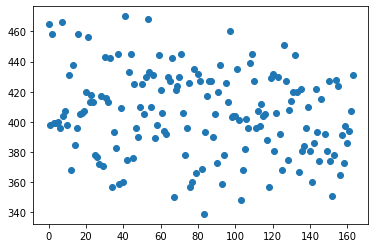

In [215]:
df = bh3 = pos[(pos.player_name == 'Harper, Bryce')
               &(pos.events == 'home_run')
              ]
df = df.sort_values(by=['game_date','at_bat_number']).reset_index(drop=False).reset_index(drop=False)
plt.scatter(df.level_0, df.hit_distance_sc)

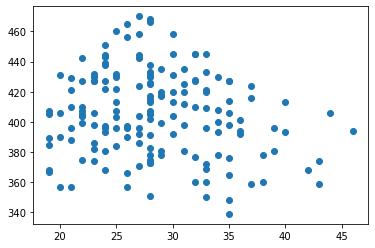

In [216]:
plt.scatter(df.launch_angle, df.hit_distance_sc)

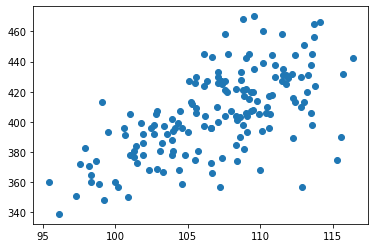

In [217]:
plt.scatter(df.launch_speed, df.hit_distance_sc)

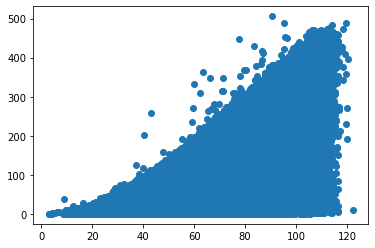

In [218]:
k = pd.concat([pos,pps])
plt.scatter(k.launch_speed, k.hit_distance_sc)

In [219]:
bh3_hrs = bh3[bh3.events == 'home_run']

In [220]:
df = bh3_hrs
b = df.groupby(['game_pk','at_bat_number'
            ,'game_year'
            # ,'game_date'
            # ,'inning'
            # ,'outs_when_up'
            # ,'home_team'
            # ,'away_team'
           ],as_index=False).agg({'hit_distance_sc' : 'mean'
                                  ,'launch_speed' : 'mean'
                                  ,'launch_angle' : 'mean'
                                 })
c = b.groupby(['game_year'],as_index=False).agg({'hit_distance_sc' : 'mean','launch_speed' : 'mean'})

In [221]:
c.round(2)

,game_year,hit_distance_sc,launch_speed
0,2019,411.14,107.49
1,2020,405.31,105.42
2,2021,410.49,108.05
3,2022,400.50,107.47
4,2023,409.62,108.03
5,2024,393.67,104.47


In [222]:
group = 'game_year'
gys = pos.groupby(group,as_index=False
           ).agg({'hit_distance_sc' : 'mean'
                        ,'launch_speed' : 'mean'
                        ,'launch_angle' : 'mean'
                        ,'release_speed'  :'mean'
                        ,'release_spin_rate' : 'mean'
                       }).round(2)
gys

,game_year,hit_distance_sc,launch_speed,launch_angle,release_speed,release_spin_rate
0,2015,168.51,86.46,11.45,88.86,2122.56
1,2016,160.97,83.42,15.90,89.31,2184.76
2,2017,161.86,82.15,15.42,88.91,2201.22
3,2018,160.19,83.07,17.05,89.01,2203.80
4,2019,164.73,84.15,17.43,88.89,2261.45
5,2020,158.24,82.77,18.24,88.39,2216.71
6,2021,150.71,81.61,16.09,89.07,2224.40
7,2022,155.74,82.74,17.58,89.08,2247.89
8,2023,157.03,82.99,17.09,89.11,2254.34
9,2024,155.05,82.74,16.71,88.94,2247.73


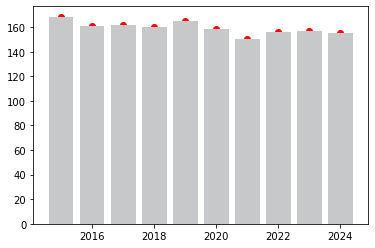

In [223]:
x = gys.game_year
y = gys.hit_distance_sc
plt.scatter(x,y, color = 'red')
plt.bar(x,y, color = '#c7c8ca')
#plt.annotate(x,y)
plt.show()

## A Bar Chart that compares the Phillies Expected Batting Average to their Batting Average in the statcast era
<br>Includes a check on OBP, SLG, OPS, and WOBA.
<br>Chicks dig the wOBA

### Gemini's Attempt at this thing
<br>This works, so now I need to prepare the data to get these columns.
<br> Well, I do not know if it works, but I believe it does so I need to prepare the data in order to validate the data.

<br> I want to be a Quality Analyst at a leading development firm. That is what I want to do, Seana.

In [226]:
# Prep Test Data set
# While watching pornography, holy shit.
# ok
df = pos
res = results('game_year')
res

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2015,22643,6064,4337,1374,130,367,1274,0.248,0.296,0.381,0.677,0.294
1,2016,22887,6007,4134,1305,161,391,1376,0.239,0.292,0.383,0.675,0.291
2,2017,24133,6117,4175,1382,174,469,1417,0.249,0.310,0.408,0.718,0.309
3,2018,24616,6110,3968,1270,186,549,1520,0.234,0.308,0.392,0.700,0.305
4,2019,24905,6221,4186,1369,215,515,1453,0.245,0.312,0.426,0.738,0.312
5,2020,8683,2210,1486,500,82,213,480,0.256,0.335,0.439,0.774,0.335
6,2021,23823,6059,4054,1288,198,527,1402,0.240,0.311,0.408,0.718,0.310
7,2022,26236,6681,4563,1505,229,511,1528,0.249,0.311,0.419,0.730,0.318
8,2023,26097,6667,4417,1522,244,559,1600,0.255,0.323,0.440,0.763,0.329
9,2024,24356,6306,4308,1447,201,509,1406,0.255,0.321,0.421,0.741,0.323


In [227]:
xpos = pd.read_csv('xpos.csv')
xpps = pd.read_csv('xpps.csv')

df = res.merge(xpos, left_on = 'game_year', right_on = 'year', suffixes = ('','_x'))
df[['game_year'
    ,'pitches'
    ,'ba'
    ,'xba'
   ]]

,game_year,pitches,ba,xba
0,2015,22643,0.248,0.242
1,2016,22887,0.239,0.234
2,2017,24133,0.249,0.241
3,2018,24616,0.234,0.227
4,2019,24905,0.245,0.243
5,2020,8683,0.256,0.258
6,2021,23823,0.240,0.240
7,2022,26236,0.249,0.249
8,2023,26097,0.255,0.252
9,2024,24356,0.255,0.255


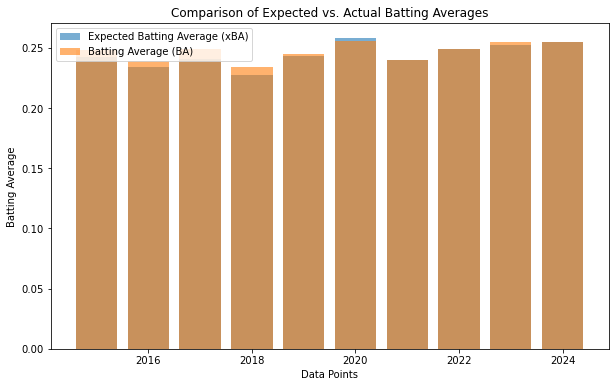

In [228]:
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame
# Replace 'your_column_name' with the actual column name in your DataFrame

x = df['game_year']  # Replace with your x-axis values
xba = df['xba']
ba = df['ba']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, xba, alpha=0.6, label='Expected Batting Average (xBA)')
plt.bar(x, ba, alpha=0.6, label='Batting Average (BA)')

# Customize the plot
plt.xlabel('Data Points')
plt.ylabel('Batting Average')
plt.title('Comparison of Expected vs. Actual Batting Averages')
plt.legend()

# Show the plot
plt.show()

In [229]:
# Ok so it is not the best data analyst I have ever seen.

### ChatGPT Attempt
This one might be better

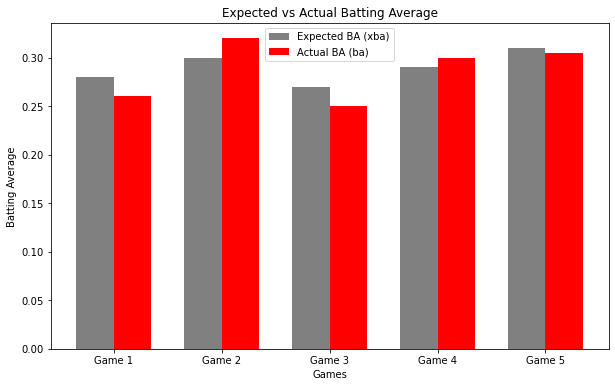

In [231]:
import numpy as np

# Sample data simulating expected and actual batting averages
data = {
    'x': ['Game 1', 'Game 2', 'Game 3', 'Game 4', 'Game 5'],
    'xba': [0.280, 0.300, 0.270, 0.290, 0.310],  # Expected batting average
    'ba': [0.260, 0.320, 0.250, 0.300, 0.305]     # Actual batting average
}
df = pd.DataFrame(data)

# Create a bar plot
bar_width = 0.35
x_labels = df['x']
index = np.arange(len(df))

plt.figure(figsize=(10, 6))
plt.bar(index, df['xba'], bar_width, color='grey', label='Expected BA (xba)')
plt.bar(index + bar_width, df['ba'], bar_width, color='red', label='Actual BA (ba)')

# Set labels and title
plt.xlabel("Games")
plt.ylabel("Batting Average")
plt.title("Expected vs Actual Batting Average")
plt.xticks(index + bar_width / 2, x_labels)
plt.legend()

plt.show()


### KS Attempt

In [233]:
df = pos
res = results('game_year')
res

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2015,22643,6064,4337,1374,130,367,1274,0.248,0.296,0.381,0.677,0.294
1,2016,22887,6007,4134,1305,161,391,1376,0.239,0.292,0.383,0.675,0.291
2,2017,24133,6117,4175,1382,174,469,1417,0.249,0.310,0.408,0.718,0.309
3,2018,24616,6110,3968,1270,186,549,1520,0.234,0.308,0.392,0.700,0.305
4,2019,24905,6221,4186,1369,215,515,1453,0.245,0.312,0.426,0.738,0.312
5,2020,8683,2210,1486,500,82,213,480,0.256,0.335,0.439,0.774,0.335
6,2021,23823,6059,4054,1288,198,527,1402,0.240,0.311,0.408,0.718,0.310
7,2022,26236,6681,4563,1505,229,511,1528,0.249,0.311,0.419,0.730,0.318
8,2023,26097,6667,4417,1522,244,559,1600,0.255,0.323,0.440,0.763,0.329
9,2024,24356,6306,4308,1447,201,509,1406,0.255,0.321,0.421,0.741,0.323


In [234]:
xpos = pd.read_csv('xpos.csv')
xpos.columns.tolist()
xpos[['year','ba','xba'
     ,'slg','woba','xwoba'
     ,'hits','abs']]

,year,ba,xba,slg,woba,xwoba,hits,abs
0,2022,0.250,0.249,0.420,0.320,0.320,1505,6032
1,2023,0.255,0.252,0.441,0.331,0.329,1522,5958
2,2019,0.246,0.243,0.427,0.314,0.315,1369,5571
3,2018,0.234,0.227,0.393,0.307,0.302,1270,5424
4,2024,0.256,0.255,0.422,0.324,0.324,1447,5661
5,2017,0.250,0.241,0.409,0.310,0.303,1382,5535
6,2021,0.240,0.240,0.408,0.313,0.314,1288,5366
7,2016,0.240,0.234,0.384,0.296,0.292,1305,5434
8,2015,0.249,0.242,0.382,0.298,0.295,1374,5529
9,2020,0.257,0.258,0.439,0.336,0.342,500,1948


In [235]:
glob.glob('*.csv')

['2016 Team W-L.csv',
 '2017 Team W-L.csv',
 '2018 Team W-L.csv',
 '2019 Team W-L.csv',
 '2020 Team W-L.csv',
 '2021 Team W-L.csv',
 '2022 Team W-L.csv',
 '2023 Team W-L.csv',
 'Aaron Nola actual minus expected.csv',
 'abel.csv',
 'alfaro_np.csv',
 'allard_np.csv',
 'alvarado_np.csv',
 'anderson_np.csv',
 'andrew abbott.csv',
 'arm_strength_20.csv',
 'arm_strength_21.csv',
 'arm_strength_22.csv',
 'arm_strength_23.csv',
 'az_batters_2023.csv',
 'az_batters_playoffs.csv',
 'az_pitchers_2023.csv',
 'az_pitchers_playoffs.csv',
 'banks_np.csv',
 'base_running.csv',
 'batter_outs_above_average.csv',
 'batting_team_outs_above_average.csv',
 'bellatti_np.csv',
 'bobby_miller.csv',
 'bryse.csv',
 'butto.csv',
 'b_az_vs_phillies_history.csv',
 'b_xphils.csv',
 'b_xphils_23.csv',
 'castellanos_np.csv',
 'castro_np.csv',
 'cave_np.csv',
 'clemens_np.csv',
 'covey_np.csv',
 'crawford_np.csv',
 'dahl_np.csv',
 'diekman_np.csv',
 'do24.csv',
 'dp24.csv',
 'edmundo_np.csv',
 'eflin_np.csv',
 'eickhof

In [236]:
# Ok so I used the list of files ending in .csv through the glob statement above

In [237]:
# I looked through a list of files and ascertained potential files that would have the desired data

In [238]:
# I first tried the file xphils.csv - this did not meet the requisite grouping at the season level

In [239]:
# Then I tried the xpos file, this looks pretty good to me.

In [240]:
res

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2015,22643,6064,4337,1374,130,367,1274,0.248,0.296,0.381,0.677,0.294
1,2016,22887,6007,4134,1305,161,391,1376,0.239,0.292,0.383,0.675,0.291
2,2017,24133,6117,4175,1382,174,469,1417,0.249,0.310,0.408,0.718,0.309
3,2018,24616,6110,3968,1270,186,549,1520,0.234,0.308,0.392,0.700,0.305
4,2019,24905,6221,4186,1369,215,515,1453,0.245,0.312,0.426,0.738,0.312
5,2020,8683,2210,1486,500,82,213,480,0.256,0.335,0.439,0.774,0.335
6,2021,23823,6059,4054,1288,198,527,1402,0.240,0.311,0.408,0.718,0.310
7,2022,26236,6681,4563,1505,229,511,1528,0.249,0.311,0.419,0.730,0.318
8,2023,26097,6667,4417,1522,244,559,1600,0.255,0.323,0.440,0.763,0.329
9,2024,24356,6306,4308,1447,201,509,1406,0.255,0.321,0.421,0.741,0.323


In [241]:
xpos

,pitches,player_id,player_name,year,total_pitches,pitch_percent,ba,iso,babip,slg,...,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance,pitcher_run_exp,run_exp,bat_speed,swing_length
0,26236,143,PHI,2022,26236,100,0.250,0.171,0.295,0.420,...,155,120,150,296,321,295,-51.6,51.6,NaN,NaN
1,26097,143,PHI,2023,26097,100,0.255,0.186,0.307,0.441,...,149,118,149,296,322,294,-50.2,50.2,NaN,NaN
2,24905,143,PHI,2019,24905,100,0.246,0.181,0.293,0.427,...,152,114,148,297,322,295,32.6,-32.6,NaN,NaN
3,24616,143,PHI,2018,24616,100,0.234,0.158,0.289,0.393,...,151,110,148,293,318,294,47.4,-47.4,NaN,NaN
4,24356,143,PHI,2024,24356,100,0.256,0.166,0.304,0.422,...,148,119,149,296,322,293,-76.6,76.6,70.019019,7.338094
5,24133,143,PHI,2017,24133,100,0.250,0.159,0.304,0.409,...,150,109,149,290,314,291,61.2,-61.2,NaN,NaN
6,23823,143,PHI,2021,23823,100,0.240,0.168,0.286,0.408,...,153,117,148,296,321,291,14.7,-14.7,NaN,NaN
7,22887,143,PHI,2016,22887,100,0.240,0.144,0.291,0.384,...,150,108,146,290,312,289,106.4,-106.4,NaN,NaN
8,22643,143,PHI,2015,22643,100,0.249,0.133,0.299,0.382,...,149,108,147,286,307,290,70.9,-70.9,NaN,NaN
9,8683,143,PHI,2020,8683,100,0.257,0.183,0.299,0.439,...,152,121,146,298,321,289,-27.0,27.0,NaN,NaN


In [244]:
z = res.merge(xpos, left_on = 'game_year', right_on = 'year', suffixes=('_res','_exp'))
for z in z.columns:
    print(z)

game_year
pitches_res
plate_apps
bip
hits_res
hrs
walks
strikeouts
ba_res
obp
slg_res
ops
woba_res
pitches_exp
player_id
player_name
year
total_pitches
pitch_percent
ba_exp
iso
babip
slg_exp
woba_exp
xwoba
xba
hits_exp
abs
launch_speed
launch_angle
spin_rate
velocity
effective_speed
whiffs
swings
takes
eff_min_vel
release_extension
pos3_int_start_distance
pos4_int_start_distance
pos5_int_start_distance
pos6_int_start_distance
pos7_int_start_distance
pos8_int_start_distance
pos9_int_start_distance
pitcher_run_exp
run_exp
bat_speed
swing_length


# Assistant
The error occurs because of a syntax issue in the `suffixes` parameter. In Python, when you specify keyword arguments, you need to use an equals sign (`=`) to assign values. In your code, you are using parentheses instead of an equals sign.

The problematic line is:


Would you like me to provide the corrected code?

# User
that was correct

# Assistant
Great! Here’s the corrected code with the necessary change:


In [250]:
z = res.merge(xpos, left_on='game_year', right_on='year', suffixes=('_res', '_exp'))  # Fixed the syntax for suffixes
z

,game_year,pitches_res,plate_apps,bip,hits_res,hrs,walks,strikeouts,ba_res,obp,...,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance,pitcher_run_exp,run_exp,bat_speed,swing_length
0,2015,22643,6064,4337,1374,130,367,1274,0.248,0.296,...,149,108,147,286,307,290,70.9,-70.9,NaN,NaN
1,2016,22887,6007,4134,1305,161,391,1376,0.239,0.292,...,150,108,146,290,312,289,106.4,-106.4,NaN,NaN
2,2017,24133,6117,4175,1382,174,469,1417,0.249,0.310,...,150,109,149,290,314,291,61.2,-61.2,NaN,NaN
3,2018,24616,6110,3968,1270,186,549,1520,0.234,0.308,...,151,110,148,293,318,294,47.4,-47.4,NaN,NaN
4,2019,24905,6221,4186,1369,215,515,1453,0.245,0.312,...,152,114,148,297,322,295,32.6,-32.6,NaN,NaN
5,2020,8683,2210,1486,500,82,213,480,0.256,0.335,...,152,121,146,298,321,289,-27.0,27.0,NaN,NaN
6,2021,23823,6059,4054,1288,198,527,1402,0.240,0.311,...,153,117,148,296,321,291,14.7,-14.7,NaN,NaN
7,2022,26236,6681,4563,1505,229,511,1528,0.249,0.311,...,155,120,150,296,321,295,-51.6,51.6,NaN,NaN
8,2023,26097,6667,4417,1522,244,559,1600,0.255,0.323,...,149,118,149,296,322,294,-50.2,50.2,NaN,NaN
9,2024,24356,6306,4308,1447,201,509,1406,0.255,0.321,...,148,119,149,296,322,293,-76.6,76.6,70.019019,7.338094



This change ensures that the `suffixes` parameter is correctly defined, resolving the SyntaxError. If you have any more questions or need further assistance, feel free to ask!

# User
Write a for loop that generates a scatterplot of y values in the list of z.columns against x values for game_year

# Assistant
To create a scatterplot of `y` values from the columns in `z` against `x` values for `game_year`, you can use the `matplotlib` library. Below is an example of how you can write a for loop to generate scatterplots for each column in `z` (except for `game_year`).

Here's a sample code snippet:


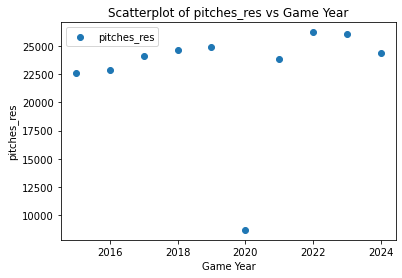

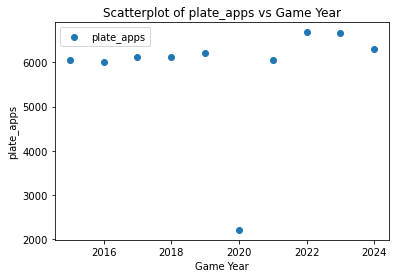

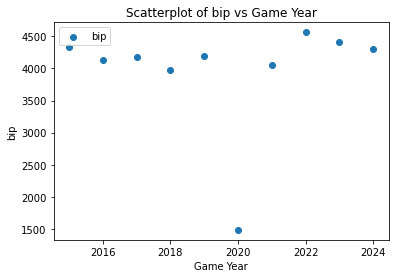

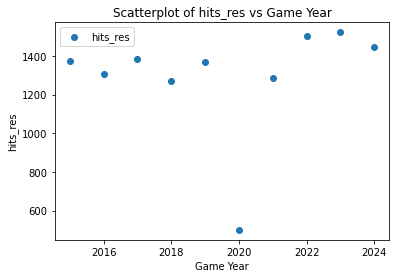

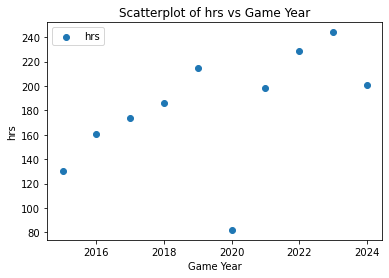

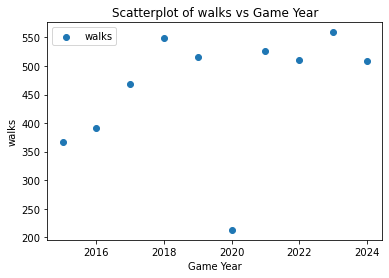

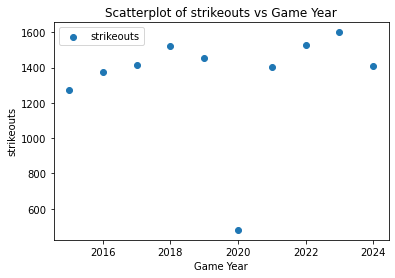

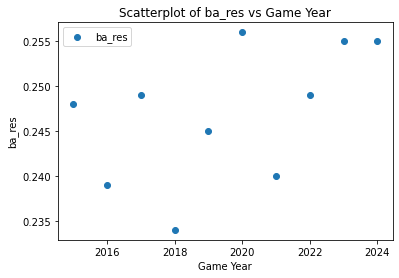

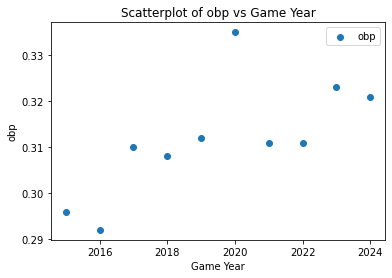

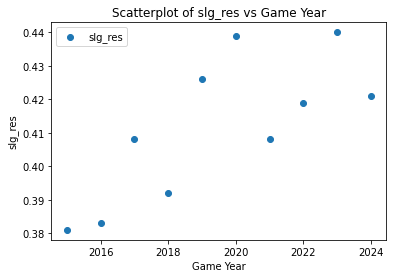

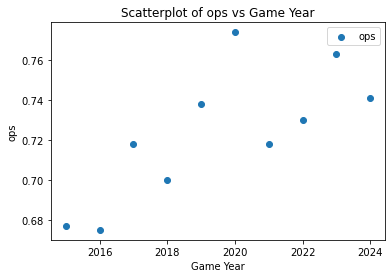

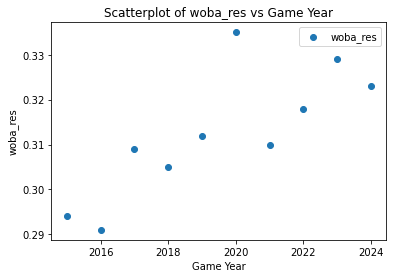

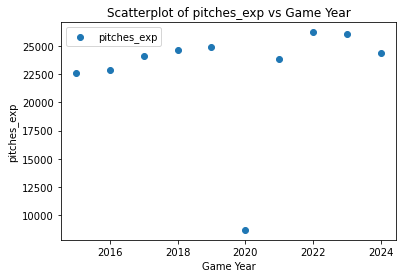

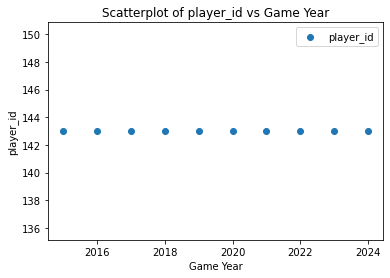

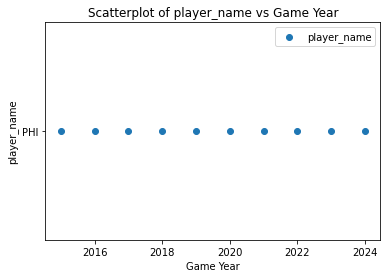

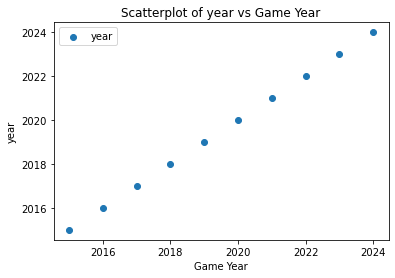

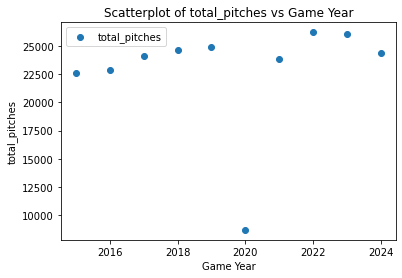

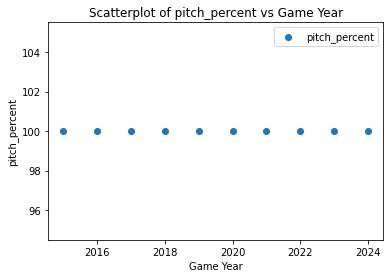

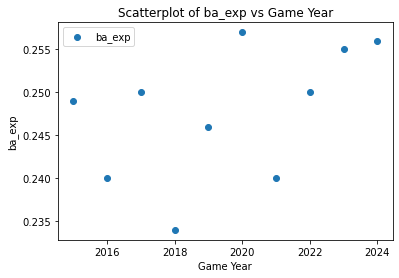

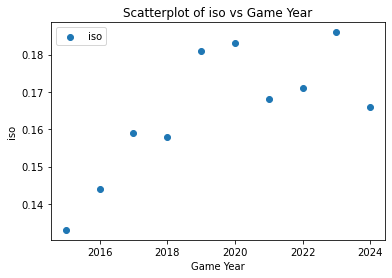

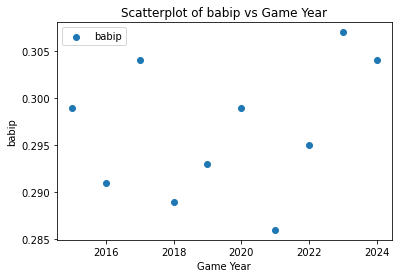

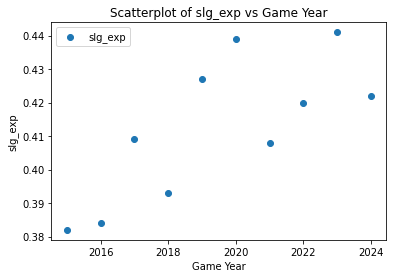

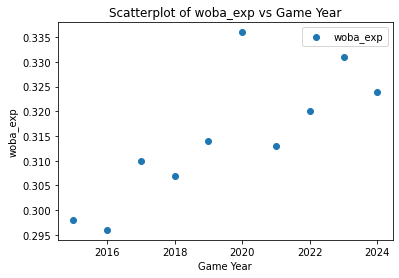

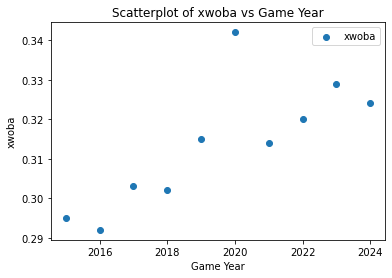

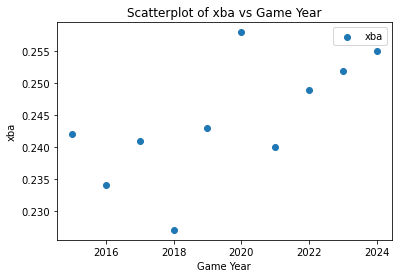

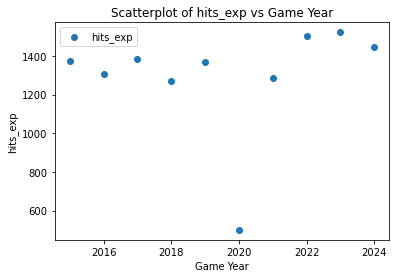

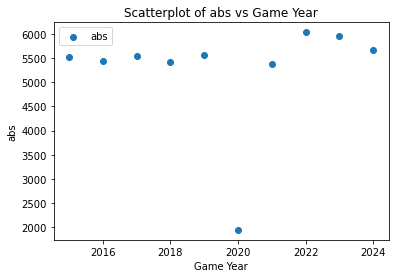

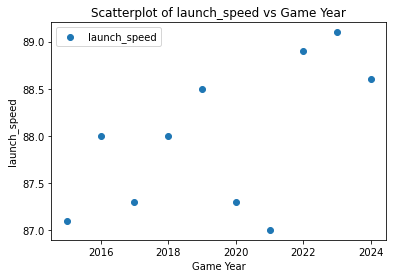

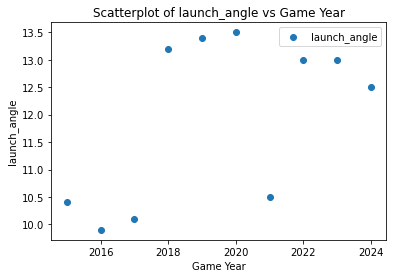

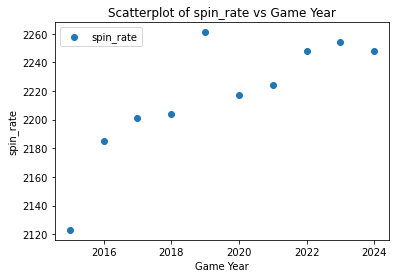

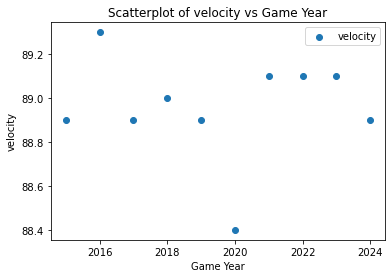

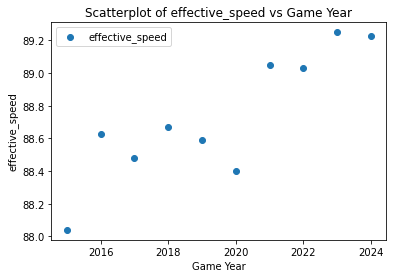

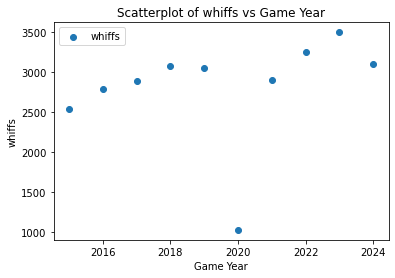

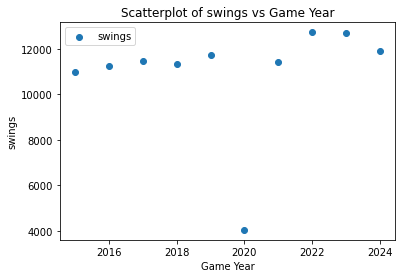

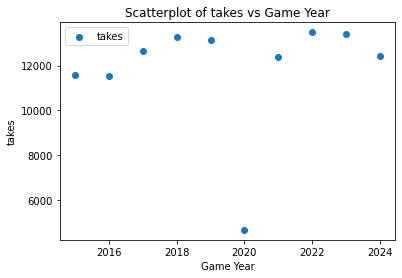

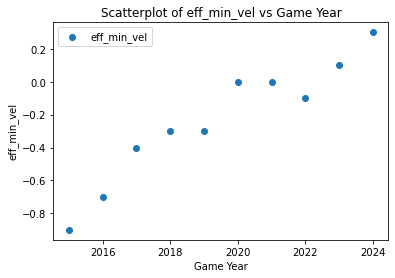

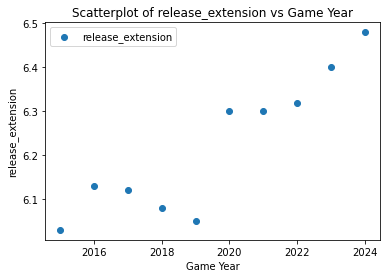

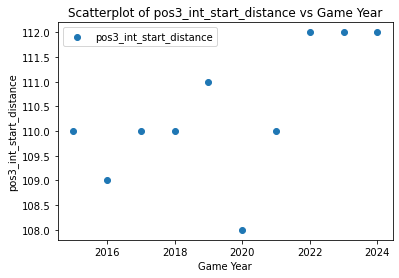

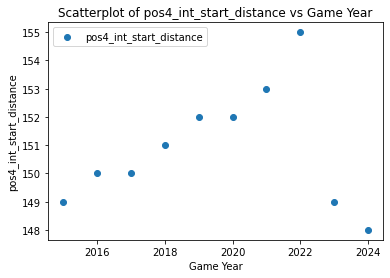

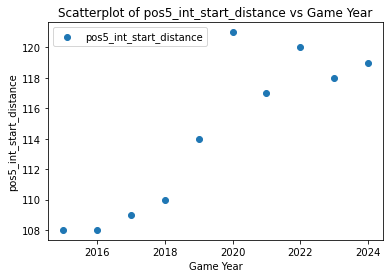

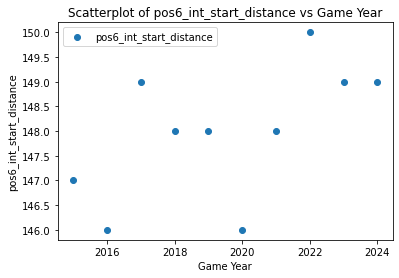

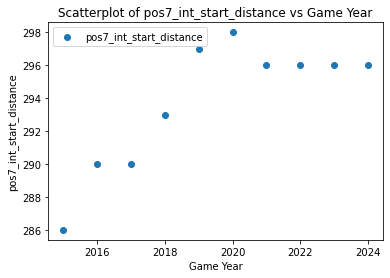

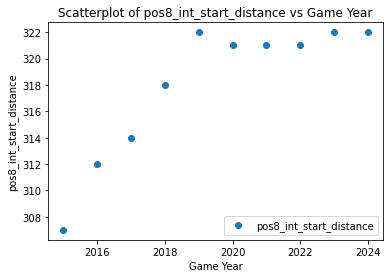

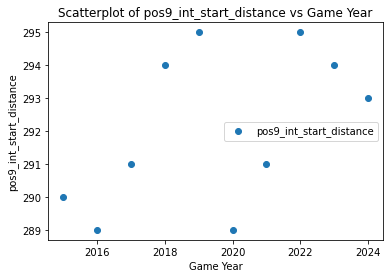

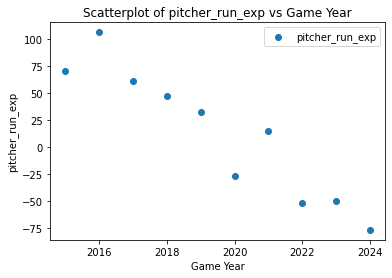

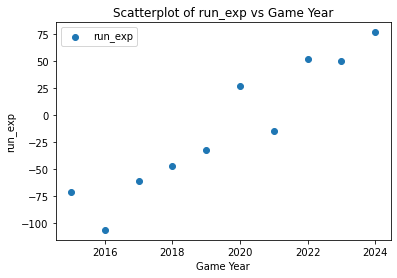

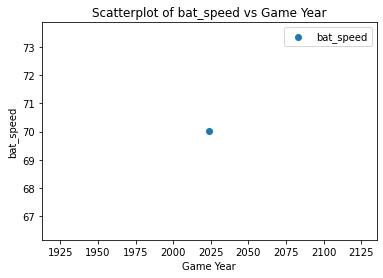

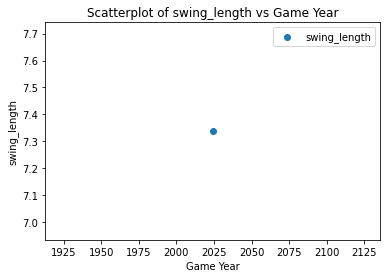

In [255]:
import matplotlib.pyplot as plt

# Assuming 'z' is your DataFrame and 'game_year' is one of the columns
for column in z.columns:
    if column != 'game_year':  # Skip the game_year column
        plt.scatter(z['game_year'], z[column], label=column)  # Create scatterplot
        plt.xlabel('Game Year')  # Label for x-axis
        plt.ylabel(column)  # Label for y-axis
        plt.title(f'Scatterplot of {column} vs Game Year')  # Title for the plot
        plt.legend()  # Show legend
        plt.show()  # Display the plot


### Explanation:
- The loop iterates through each column in the DataFrame `z`.
- It checks if the column is not `game_year` to avoid plotting against itself.
- For each valid column, it creates a scatterplot with `game_year` on the x-axis and the current column on the y-axis.
- Labels and titles are added for clarity, and `plt.show()` is called to display each plot.

If you need any modifications or further assistance, let me know!

In [257]:
# Ok of these I think the most interesting have to be the wobas to start, right?
z[['game_year'
   #,'pitches'
   ,'plate_apps'
   ,'woba_res','woba_exp'
   ,'xwoba'
   ,'slg_res','slg_exp'
   ,'obp'
   ,'ops'
   #,'xslg'
  ]]

,game_year,plate_apps,woba_res,woba_exp,xwoba,slg_res,slg_exp,obp,ops
0,2015,6064,0.294,0.298,0.295,0.381,0.382,0.296,0.677
1,2016,6007,0.291,0.296,0.292,0.383,0.384,0.292,0.675
2,2017,6117,0.309,0.310,0.303,0.408,0.409,0.310,0.718
3,2018,6110,0.305,0.307,0.302,0.392,0.393,0.308,0.700
4,2019,6221,0.312,0.314,0.315,0.426,0.427,0.312,0.738
5,2020,2210,0.335,0.336,0.342,0.439,0.439,0.335,0.774
6,2021,6059,0.310,0.313,0.314,0.408,0.408,0.311,0.718
7,2022,6681,0.318,0.320,0.320,0.419,0.420,0.311,0.730
8,2023,6667,0.329,0.331,0.329,0.440,0.441,0.323,0.763
9,2024,6306,0.323,0.324,0.324,0.421,0.422,0.321,0.741


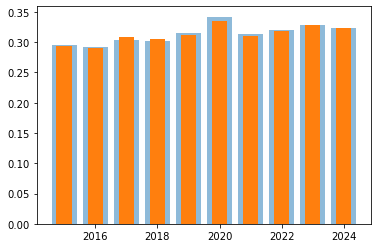

In [258]:
x = z.game_year
y = z.woba_res
plt.bar(z.game_year,z.xwoba,alpha=0.5)
plt.bar(x,y,width=0.5)
plt.show()

In [259]:
# Now what if I make this a scatter plot for batting averages

In [260]:
z

,game_year,pitches_res,plate_apps,bip,hits_res,hrs,walks,strikeouts,ba_res,obp,...,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance,pitcher_run_exp,run_exp,bat_speed,swing_length
0,2015,22643,6064,4337,1374,130,367,1274,0.248,0.296,...,149,108,147,286,307,290,70.9,-70.9,NaN,NaN
1,2016,22887,6007,4134,1305,161,391,1376,0.239,0.292,...,150,108,146,290,312,289,106.4,-106.4,NaN,NaN
2,2017,24133,6117,4175,1382,174,469,1417,0.249,0.310,...,150,109,149,290,314,291,61.2,-61.2,NaN,NaN
3,2018,24616,6110,3968,1270,186,549,1520,0.234,0.308,...,151,110,148,293,318,294,47.4,-47.4,NaN,NaN
4,2019,24905,6221,4186,1369,215,515,1453,0.245,0.312,...,152,114,148,297,322,295,32.6,-32.6,NaN,NaN
5,2020,8683,2210,1486,500,82,213,480,0.256,0.335,...,152,121,146,298,321,289,-27.0,27.0,NaN,NaN
6,2021,23823,6059,4054,1288,198,527,1402,0.240,0.311,...,153,117,148,296,321,291,14.7,-14.7,NaN,NaN
7,2022,26236,6681,4563,1505,229,511,1528,0.249,0.311,...,155,120,150,296,321,295,-51.6,51.6,NaN,NaN
8,2023,26097,6667,4417,1522,244,559,1600,0.255,0.323,...,149,118,149,296,322,294,-50.2,50.2,NaN,NaN
9,2024,24356,6306,4308,1447,201,509,1406,0.255,0.321,...,148,119,149,296,322,293,-76.6,76.6,70.019019,7.338094


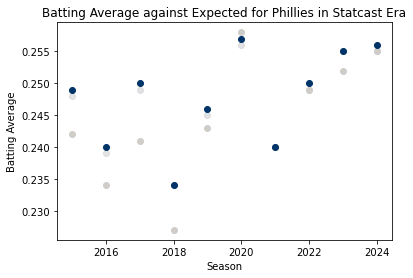

In [261]:
z[['game_year','ba_res','ba_exp','xba']]
plt.scatter(z.game_year,z.ba_res, color = '#c7c8ca', alpha = 0.5)
plt.scatter(z.game_year
            ,z.xba
            ,color = '#d0cdc9'
            ,alpha = 1
           )
plt.scatter(z.game_year
            ,z.ba_exp
            ,color = '#003469'
           )
plt.xlabel('Season')
plt.ylabel('Batting Average')
#plt.subtitle('Batting Average in Blue, Expected BA in Grey')
plt.title('Batting Average against Expected for Phillies in Statcast Era')
plt.show()

# 1. Nick Castellanos hitting home runs

In [264]:
nc = pos[pos.player_name == 'Castellanos, Nick']
nc_np = nphl[nphl.player_name == 'Castellanos, Nick']
nc_np = nc_np.merge(woba_weights, left_on = 'game_year', right_on = 'Season', suffixes = ('','_yamomma'))
df = pd.concat([nc,nc_np])
results('game_year')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,2015,2317,595,403,140,15,38,152,0.255,0.301,0.418,0.719,0.310
1,2016,1729,447,305,117,18,27,111,0.285,0.329,0.496,0.825,0.349
2,2017,2605,666,477,167,26,41,142,0.271,0.320,0.489,0.808,0.340
3,2018,2439,673,472,185,23,44,151,0.298,0.349,0.500,0.849,0.363
4,2019,2436,664,475,178,27,40,143,0.289,0.336,0.524,0.860,0.357
5,2020,1005,251,156,52,14,18,73,0.228,0.295,0.482,0.777,0.328
6,2021,2143,580,416,164,34,36,121,0.309,0.357,0.576,0.933,0.391
7,2022,2320,628,443,150,13,32,148,0.254,0.296,0.373,0.669,0.294
8,2023,2614,723,481,180,34,38,199,0.267,0.306,0.481,0.787,0.334
9,2024,2392,676,483,161,24,39,141,0.258,0.311,0.435,0.746,0.323


# 2. I am listening to Preston Mattingly so of course I am getting fired up about Andrew Painter

# 3. Trea Turner outfield defense against the Phillies

In [267]:
trea = pos[pos.player_name == 'Turner, Trea']
trea.batter.unique()[0]

607208

# 4. Results by Game Year

In [269]:
df = pos
res_gy = results('game_year')

In [270]:
res_gy.sort_values(by='ops',ascending=False)

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
5,2020,8683,2210,1486,500,82,213,480,0.256,0.335,0.439,0.774,0.335
8,2023,26097,6667,4417,1522,244,559,1600,0.255,0.323,0.440,0.763,0.329
9,2024,24356,6306,4308,1447,201,509,1406,0.255,0.321,0.421,0.741,0.323
4,2019,24905,6221,4186,1369,215,515,1453,0.245,0.312,0.426,0.738,0.312
7,2022,26236,6681,4563,1505,229,511,1528,0.249,0.311,0.419,0.730,0.318
2,2017,24133,6117,4175,1382,174,469,1417,0.249,0.310,0.408,0.718,0.309
6,2021,23823,6059,4054,1288,198,527,1402,0.240,0.311,0.408,0.718,0.310
3,2018,24616,6110,3968,1270,186,549,1520,0.234,0.308,0.392,0.700,0.305
0,2015,22643,6064,4337,1374,130,367,1274,0.248,0.296,0.381,0.677,0.294
1,2016,22887,6007,4134,1305,161,391,1376,0.239,0.292,0.383,0.675,0.291


In [271]:
df = pps
pps_res_gy = results('game_year')

In [272]:
pps_res_gy.sort_values(by = 'ops')

,game_year,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
7,2022,25618,6615,4450,1447,167,487,1587,0.241,0.304,0.385,0.689,0.303
8,2023,25442,6533,4405,1409,193,494,1566,0.238,0.300,0.390,0.690,0.300
9,2024,24121,6202,4204,1375,188,452,1474,0.243,0.305,0.398,0.703,0.307
3,2018,23750,6117,4109,1366,171,465,1465,0.248,0.309,0.406,0.715,0.309
6,2021,23739,6026,3991,1321,200,472,1480,0.243,0.310,0.413,0.723,0.312
1,2016,23836,6170,4346,1468,213,436,1299,0.265,0.317,0.447,0.764,0.325
2,2017,23972,6204,4335,1471,221,488,1309,0.264,0.326,0.446,0.772,0.329
0,2015,23839,6338,4627,1592,191,451,1153,0.279,0.332,0.444,0.776,0.334
4,2019,24310,6246,4265,1452,258,508,1392,0.260,0.325,0.452,0.777,0.327
5,2020,8570,2186,1452,550,80,173,532,0.279,0.344,0.468,0.812,0.348


In [273]:
df = pd.concat([pos,nphl,pps])
results('stand')

,stand,pitches,plate_apps,bip,hits,hrs,walks,strikeouts,ba,obp,slg,ops,woba
0,L,339835,85236,56824,18692,2795,7877,19398,0.247,0.322,0.420,0.741,0.321
1,R,454386,117937,81356,27123,3576,8539,26439,0.254,0.314,0.415,0.728,0.314


In [289]:
git clone https://github.com/kshort24/Baseball.git

SyntaxError: invalid syntax (2398480230.py, line 1)